# Trabajo práctico 1: Reservas de hotel
**Grupo 10**

*   De Matías Pose, Ignacio
*   Duzac, Juan Martín
*   Pico, Carolina
*   Bigey, Pierre


En esta notebook vamos a trabajar cada una de las etapas del proceso de un problema real de ciencia de datos y resolverlo.
Mediante un conjunto de datos de reservas de hotel provisto por la cátedra, aplicaremos técnicas de análisis exploratorio, preprocesamiento de datos y entrenarémos modelos de clasificación para predecir si una reserva será o no cancelada.

# Librerias

In [ ]:
#Drive para montar los csv
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

#Exploración inicial del dataset

In [ ]:
df_hotels_train_original = pd.read_csv("/content/drive/MyDrive/datasets/Tp1OrgDatos/hotels_train.csv")
df_hotels_test_original = pd.read_csv("/content/drive/MyDrive/datasets/Tp1OrgDatos/hotels_test.csv")


In [ ]:
df_hotels_train_copy = df_hotels_train_original.copy()
df_hotels_test_copy = df_hotels_test_original.copy()

## Primera mirada del dataset
Observamos las primeras filas del dataset para tener idea de como está compuesto

In [ ]:
df_hotels_train_copy.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   agent company days_in_waiting_list    customer_type    adr  \
0    9.0     NaN                    0        Transient  115.5   
1    NaN     NaN                    0        Transient   42.0   
2    9.0     NaN                    0        Transient  229.0   
3  154.0     NaN                    0        Transient   75.0   
4   20.0     NaN                    0  Transient-Party   75.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   
2                            0                          2   
3                            0                          0   
4                            0                          1   

   reservation_status_date                                    id is_canceled  
0               2016-08-25  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1               2015-11-01  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2               2016-10-14  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3               2016-11-29  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4               2017-03-26  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 32 columns]

In [ ]:
df_hotels_train_copy.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled'],
      dtype='object')

Se extrae informacion sobre la copia del dataset con el objetivo de conocer los datos y sus tipos.

In [ ]:
df_hotels_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Verificamos si hay filas repetidas

In [ ]:
df_hotels_train_original[df_hotels_train_original.duplicated(keep=False)]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status_date, id, is_canceled]
Index: []

[0 rows x 32 columns]

### Valores nulos

In [ ]:
df_hotels_train_copy.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Acá ya podemos observar sin entrar en específico a cada variable, la cantidad de nulos por columna. Luego analizaremos esto con mayor profundidad.

## Variables cualitativas

|Columna|Tipo de Variable|Descripción|
|----------|--------------|---------------|
|Agent|Categórica|ID de la agencia de viaje que hizo la reserva|
|ArrivalDateMonth|Categórica|Mes de la fecha de llegada con 12 categorías: “January” a “December”|
|AssignedRoomType|Categórica|Código para el tipo de habitación reservada|
|Company|Categórica|ID de la compañía o entidad que hizo o es responsable del pago de la reserva or responsible|
|Country|Categórica|País de origen. Las categorías son representadas en el formato ISO 3155–3:2013|
|CustomerType|Categórica|Tipo de reserva|
|DepositType|Categórica|Indicación de si un cliente hizo un depósito para garantizar la reserva|
|DistributionChannel|Categórica|Canal de distribución de la reserva|
|Hotel|Categórica|Nombre del hotel|
|IsCanceled|Categórica binaria|Valor que indica si una reserva se canceló o no|
|ID|Categórica|Número de identificación único en la reserva|
|IsRepeatedGuest|Categórica binaria|Valor que indica si un cliente es repetido|
|MarketSegment|Categórica|Designación de segmento de mercado|
|Meal|Categórica|Tipo de comida reservada|
|ReservedRoomType|Categórica|Código del tipo de habitación reservada|


### Analizamos la cantidad de apariciones de cada una de las variables

Generamos un DataFrame para la manipulación de los datos:

In [ ]:
variables_cualitativas = pd.DataFrame(data = df_hotels_train_copy, columns = ["agent", "arrival_date_month", "assigned_room_type", "company","country","customer_type",
                                                                              "deposit_type","distribution_channel","hotel","is_canceled","id","is_repeated_guest",
                                                                              "market_segment","meal","reserved_room_type"])
variables_cualitativas

agent arrival_date_month assigned_room_type  company country  \
0        9.0          September                  D      NaN     USA   
1        NaN            October                  A      NaN     PRT   
2        9.0            October                  F      NaN     CHE   
3      154.0           December                  A      NaN     PRT   
4       20.0              March                  A      NaN     FRA   
...      ...                ...                ...      ...     ...   
61908  240.0            January                  D      NaN     ESP   
61909    NaN          September                  A      NaN     FRA   
61910    NaN                May                  A    153.0     FRA   
61911   96.0            October                  A      NaN     PRT   
61912    9.0              April                  D      NaN     ISR   

         customer_type deposit_type distribution_channel         hotel  \
0            Transient   No Deposit                TA/TO    City Hotel   
1            Transient   No Deposit               Direct  Resort Hotel   
2            Transient   No Deposit                TA/TO    City Hotel   
3            Transient   Non Refund                TA/TO    City Hotel   
4      Transient-Party   No Deposit                TA/TO    City Hotel   
...                ...          ...                  ...           ...   
61908        Transient   No Deposit                TA/TO  Resort Hotel   
61909        Transient   No Deposit                TA/TO    City Hotel   
61910        Transient   No Deposit            Corporate    City Hotel   
61911        Transient   Non Refund                TA/TO  Resort Hotel   
61912        Transient   No Deposit                TA/TO    City Hotel   

       is_canceled                                    id  is_repeated_guest  \
0                1  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689                  0   
1                0  b1428f80-c56c-4ae4-91a9-6962edae08b1                  0   
2                0  2226c018-ea20-4c4e-8f71-ea66aee70d7c                  0   
3                1  314f56dc-2e4d-4298-9bdd-27bb008bffff                  0   
4                0  28c75445-c603-413a-babf-ad377018b592                  0   
...            ...                                   ...                ...   
61908            1  32bffef5-5404-4e86-9f39-fd2282e1ad7f                  0   
61909            0  cc922a1c-356e-42a5-a984-0b1af03c2f5c                  0   
61910            0  76fb0e83-59df-43ee-9c33-aec51030ed45                  0   
61911            1  01906859-1094-4e37-b13e-b015b594d159                  0   
61912            1  7137e599-4442-41fb-b147-4aba9f344e38                  0   

      market_segment meal reserved_room_type  
0          Online TA   BB                  D  
1             Groups   BB                  A  
2          Online TA   BB                  F  
3             Groups   BB                  A  
4      Offline TA/TO   BB                  A  
...              ...  ...                ...  
61908      Online TA   BB                  A  
61909      Online TA   SC                  A  
61910       Aviation   BB                  A  
61911         Groups   BB                  A  
61912      Online TA   HB                  D  

[61913 rows x 15 columns]

#### **Hotel**

Esta variable indica el tipo de hotel, se divide en:

*   Resort hotel
*   City hotel



In [ ]:
variables_cualitativas.hotel.value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable hotel '}, xlabel='Hotel', ylabel='Frecuencia'>

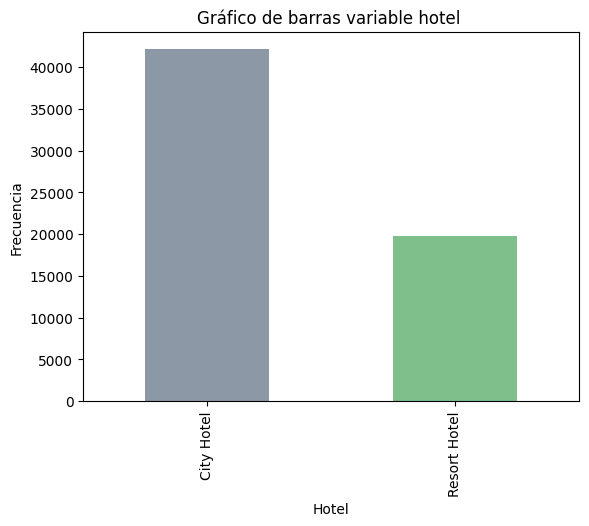

In [ ]:
colores=[(0.1, 0.2, 0.3),(0, 0.5, 0.1)]
variables_cualitativas.hotel.value_counts().plot.bar(alpha=0.5 , color=colores, title="Gráfico de barras variable hotel " , xlabel="Hotel" , ylabel="Frecuencia")

<Figure size 200x200 with 0 Axes>

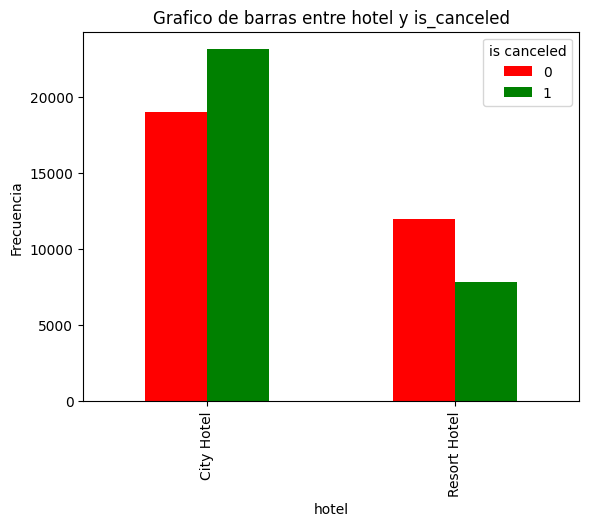

In [ ]:

table = pd.crosstab(df_hotels_train_copy['hotel'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(2, 2))

ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre hotel y is_canceled')
plt.legend(title='is canceled')

plt.show()

Ahora realizamos el gráfico pero en porcentaje

<Figure size 200x200 with 0 Axes>

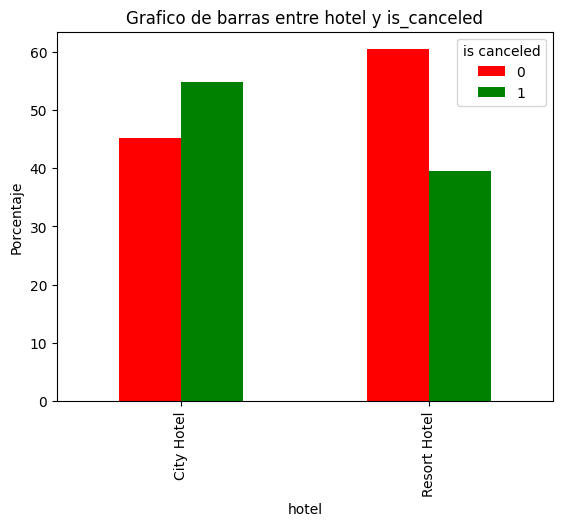

In [ ]:
table = pd.crosstab(df_hotels_train_copy['hotel'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(2, 2))
table_percentage = table.div(table.sum(1), axis=0) * 100

ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre hotel y is_canceled')
plt.legend(title='is canceled')

plt.show()

Observamos que según el hotel hay mayor porcentaje de cancelaciones (City hotel) o no cancelaciones (Resort Hotel)

#### **arrival_date_month** 

Esta variable indica el mes de llegada

In [ ]:
variables_cualitativas.arrival_date_month.value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

Hay que tener en cuenta en esta variable que 2015 y 2017 no incluyen algunos meses. Los dos mayores meses Agosto y Julio son los únicos dos meses incluidos en los 3 años. Mayo es el mes con mas arribos que solo se incluye en 2016 y 2017

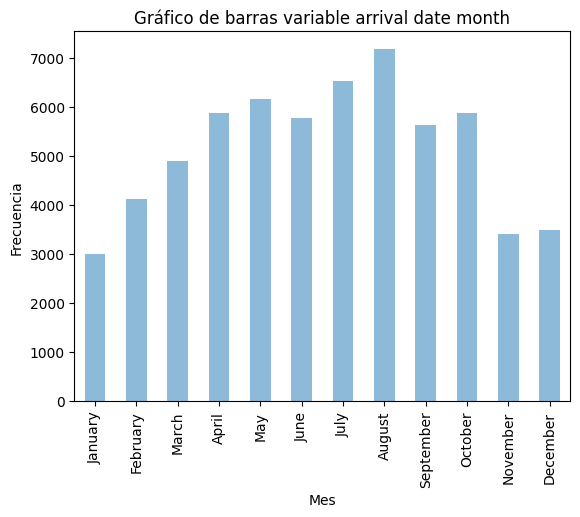

In [ ]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# apply the mapping to the 'arrival_date_month' column, calculate the frequency counts, and plot the results
counts = variables_cualitativas.arrival_date_month.map(month_dict).value_counts().sort_index()
ax = counts.plot(kind='bar', alpha=0.5, title="Gráfico de barras variable arrival date month", xlabel="Mes", ylabel="Frecuencia")

# update the x-axis labels using the month names
labels = [month for month in month_dict.keys()]
ax.set_xticklabels(labels)

plt.show()

<Figure size 1x1 with 0 Axes>

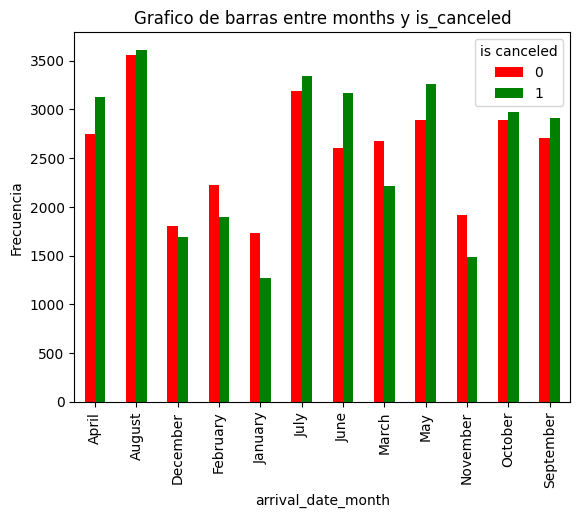

In [ ]:
table = pd.crosstab(df_hotels_train_copy['arrival_date_month'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre months y is_canceled')
plt.legend(title='is canceled')

plt.show()

Gráfico en porcentaje

<Figure size 1x1 with 0 Axes>

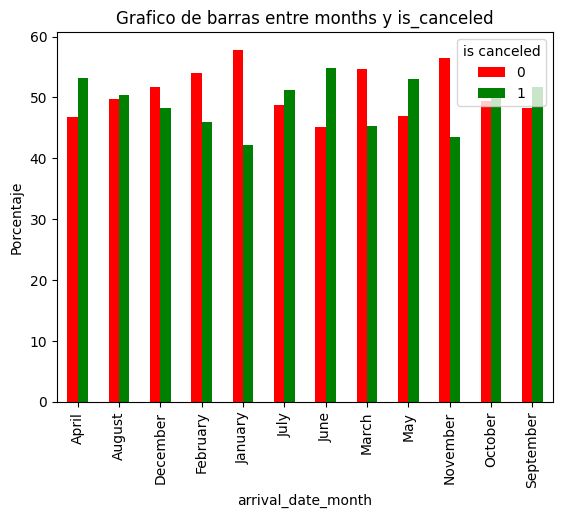

In [ ]:
table = pd.crosstab(df_hotels_train_copy['arrival_date_month'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')

plt.title('Grafico de barras entre months y is_canceled')
plt.legend(title='is canceled')

plt.show()

#### **meal**


Es una variable indica el tipo de paquete de comidas encargado por el huesped para la reserva.



*   BB - Bed & Breakfast
*   HB - Halfboard (Breakfast and one other meal - usually dinner)
*   FB - Fullboard (Breakfast, lunch and dinner)
*   Undefined/SC - No meal package 

Es probable que juntar SC y Undefined en una misma variable sea conveniente para futuros analisis y entrenamientos de modelos.

In [ ]:
variables_cualitativas.meal.value_counts()

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable meal '}, xlabel='Paquete de comida', ylabel='Frecuencia'>

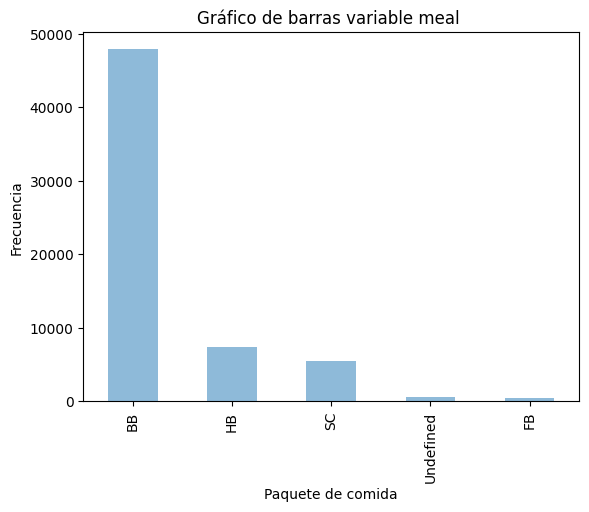

In [ ]:
variables_cualitativas.meal.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable meal " , xlabel="Paquete de comida" , ylabel="Frecuencia")

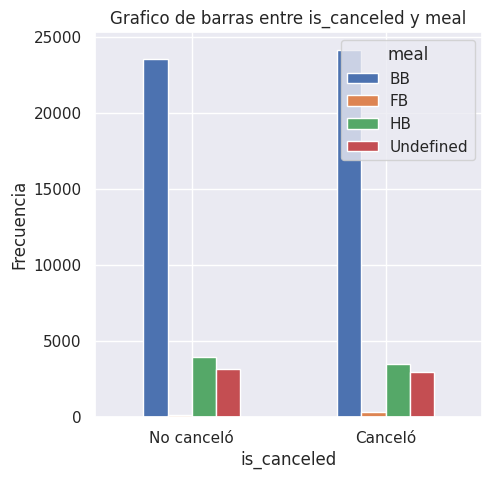

In [ ]:

table = pd.crosstab(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['meal'])

fig, ax = plt.subplots(figsize=(5,5))

table.plot(kind='bar', stacked=False, ax=ax)

ax.set_xticklabels(['No canceló', 'Canceló'], rotation=0)
ax.set_xlabel('is_canceled')
ax.set_ylabel('Frecuencia')
plt.title('Grafico de barras entre is_canceled y meal')
plt.show()

Observamos como el plan de comidas no parece tener relación con si una reserva está o no cancelada.

#### **country**

Esta variable indica el país de origen

In [ ]:
variables_cualitativas.country.value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

In [ ]:
variables_cualitativas.country.value_counts().sort_values(ascending=False).head(20)

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
RUS      337
ISR      322
NOR      302
Name: country, dtype: int64

El paper nos indica que es normal para los hoteles no conocer la correcta nacionalidad del huesped hasta el momento del checkin. Por lo que sería interesante analizar esta variable en conjunto con el dato de si se realizo el check in.

<Axes: title={'center': 'Top 20 paises en cantidad de reservas'}, xlabel='País', ylabel='Frecuencia'>

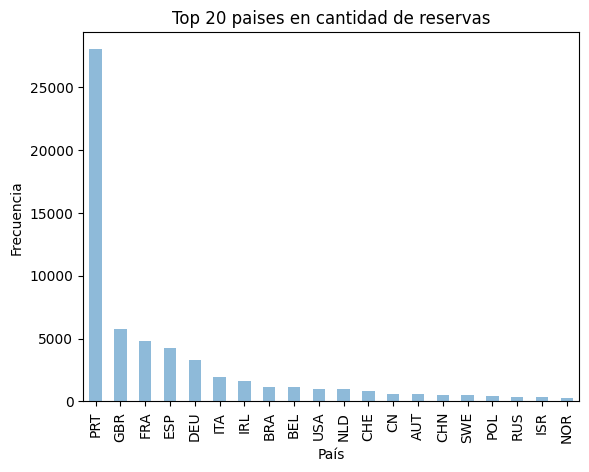

In [ ]:
variables_cualitativas.country.value_counts().sort_values(ascending=False).head(20).plot.bar(alpha=0.5 , title="Top 20 paises en cantidad de reservas" , xlabel="País" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

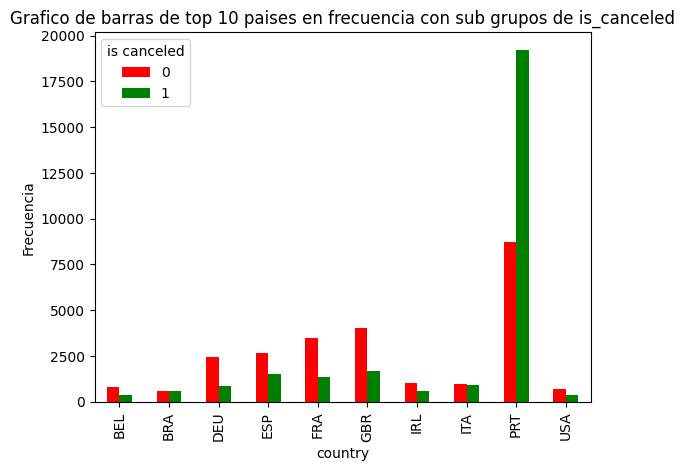

In [ ]:
top_10_paises = df_hotels_train_copy['country'].value_counts().head(10)
df_top_10_paises = df_hotels_train_copy[df_hotels_train_copy['country'].isin(top_10_paises.index)]

table = pd.crosstab(df_top_10_paises['country'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras de top 10 paises en frecuencia con sub grupos de is_canceled')
plt.legend(title='is canceled')

plt.show()

Se puede observar que la mayoría de las reservas de portugal si son canceladas, mientras que las provenientes de otros paises dentro del top 10, o estan más parejas o tienen mayor cantidad de no canceladas.
Igualmente la frecuencia de portugal nos desvirtua la escala, por lo que pasemos a graficar lo mismo pero en porcentajes.

<Figure size 1x1 with 0 Axes>

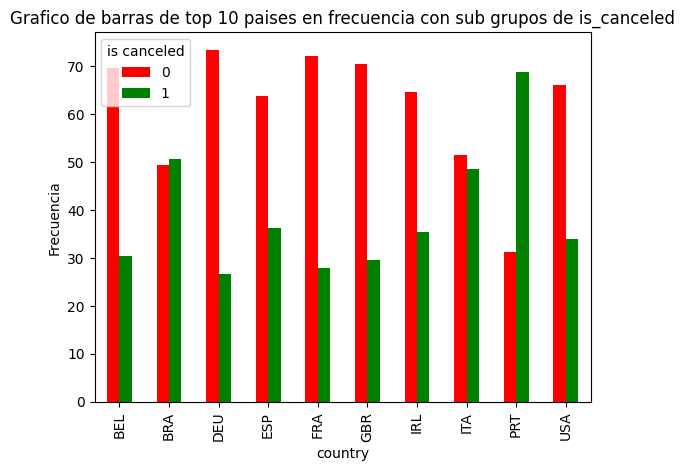

In [ ]:
top_10_paises = df_hotels_train_copy['country'].value_counts().head(10)
df_top_10_paises = df_hotels_train_copy[df_hotels_train_copy['country'].isin(top_10_paises.index)]

table = pd.crosstab(df_top_10_paises['country'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))
table_percentage = table.div(table.sum(1), axis=0) * 100

ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras de top 10 paises en frecuencia con sub grupos de is_canceled')
plt.legend(title='is canceled')

plt.show()

Observamos como los paises distintos a portugal se comportan opuesto a portugal, por lo que una variable como is_portuguese podría llegar a ser útil, y la tendremos en cuenta.

Por otro lado Brasil e italia, esta bastante parejo cercano a un 50/50

#### is_portuguese

In [ ]:
df_train_con_is_portuguese = df_hotels_train_copy.copy()
df_train_con_is_portuguese['is_portuguese'] = [1]*len(df_train_con_is_portuguese)

df_train_con_is_portuguese.loc[df_train_con_is_portuguese['country'] != 'PRT', 'is_portuguese'] = 0


df_train_con_is_portuguese.is_portuguese.value_counts()

0    33963
1    27950
Name: is_portuguese, dtype: int64

<Figure size 1x1 with 0 Axes>

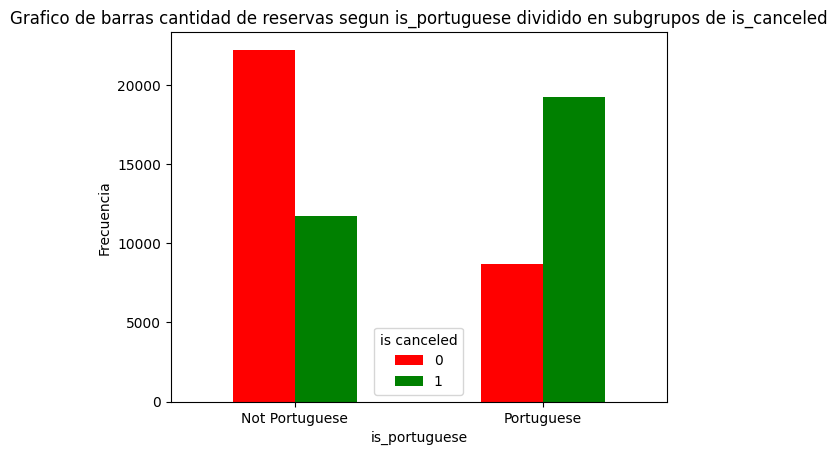

In [ ]:
table = pd.crosstab(df_train_con_is_portuguese['is_portuguese'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['Not Portuguese', 'Portuguese'], rotation=0)

plt.title('Grafico de barras cantidad de reservas segun is_portuguese dividido en subgrupos de is_canceled')
plt.legend(title='is canceled')

plt.show()

En este gráfico apreciamos claramente este efecto "opuesto" mencionado de la cancelación de una reserva según si el cliente es o no portugues.
Al mismo tiempo bajo esta variable se perdería información de ciertos paises que tenían una relación mas pareja entre cancelación y no cancelación como Brasil.

#### **market_segment**

Esta variable nos indica el segmento de mercado, TA hace referencia a Travel agents y TO a Tour operators.
Como vemos hay ciertas reservas con Undefined pero son muy pocas. 

In [ ]:
variables_cualitativas.market_segment.value_counts()

Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

Observamos 2 filas con el valor Undefined, luego serán tratadas en la sección de valores nulos.

<Axes: title={'center': 'Gráfico de barras variable market segment '}, xlabel='segmento de mercado', ylabel='Frecuencia'>

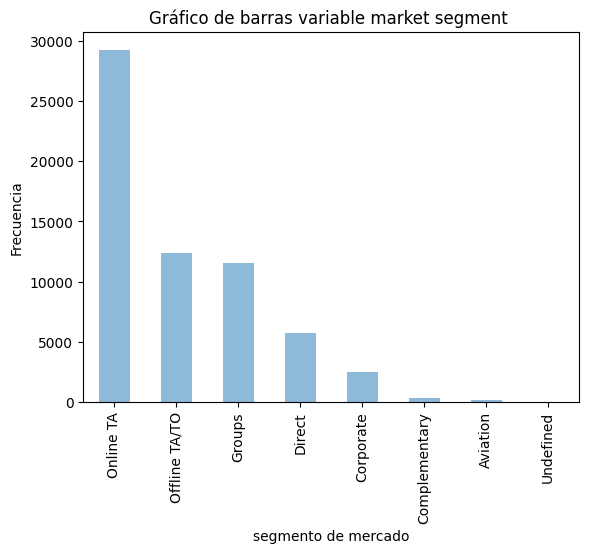

In [ ]:
variables_cualitativas.market_segment.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable market segment " , xlabel="segmento de mercado" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

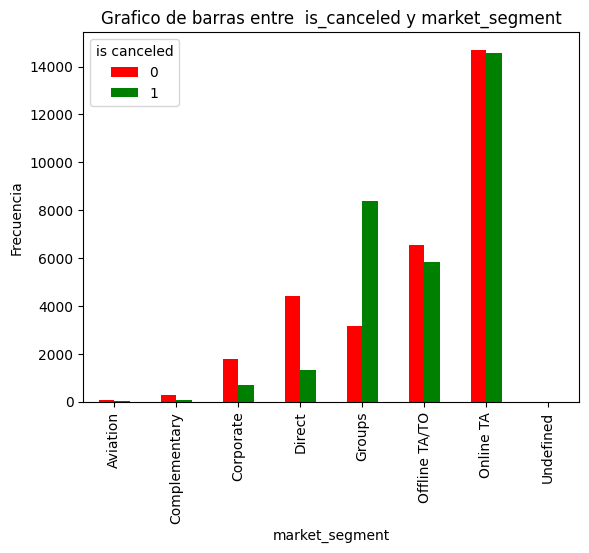

In [ ]:
table = pd.crosstab(df_hotels_train_copy['market_segment'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y market_segment')
plt.legend(title='is canceled')

plt.show()

Observemos el mismo gráfico en porcentajes, para que la frecuencia de Online TA, no impacte tanto visualmente

<Figure size 1x1 with 0 Axes>

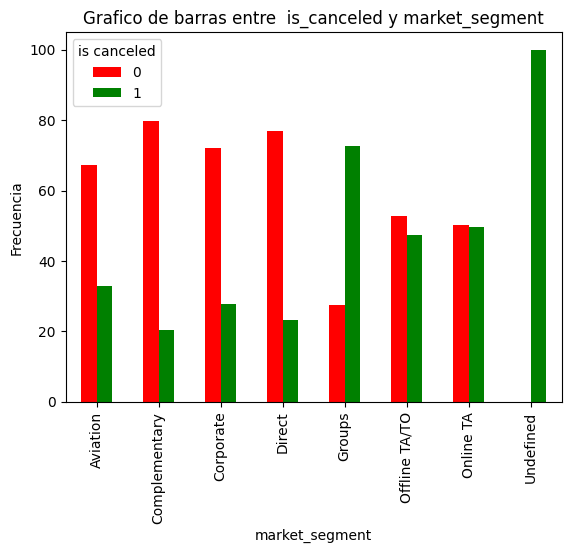

In [ ]:
table = pd.crosstab(df_hotels_train_copy['market_segment'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y market_segment')
plt.legend(title='is canceled')

plt.show()

Las categorías offline TA/TO y Online TA (Que son las de mayor frecuencia) no tienen mucha diferencia porcentual entre cancelado y no cancelado. Mientras que las demás si, pero hay que tener en cuenta ciertas categorías como Aviation, Comlementary y Corporate pueden llegar a tener poca data y por lo tanto que este porcentaje pueda parecer más llamativo de lo que debería.

Groups es la tercera en frecuencia y al mismo tiempo denota una diferencia significativa entre los subgrupos de is_canceled

Por último undifined presenta solo 2 filas y estas serán tratadas mas adelante en valores nulos.

#### **distribution_channel**

Esta variable nos indica el canal de distribución de la reserva

In [ ]:
variables_cualitativas.distribution_channel.value_counts()

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

TA refiere a Travel Agent y TO a Tour operators.

<Axes: title={'center': 'Gráfico de barras variable distribution channel '}, xlabel='Canal de distribución', ylabel='Frecuencia'>

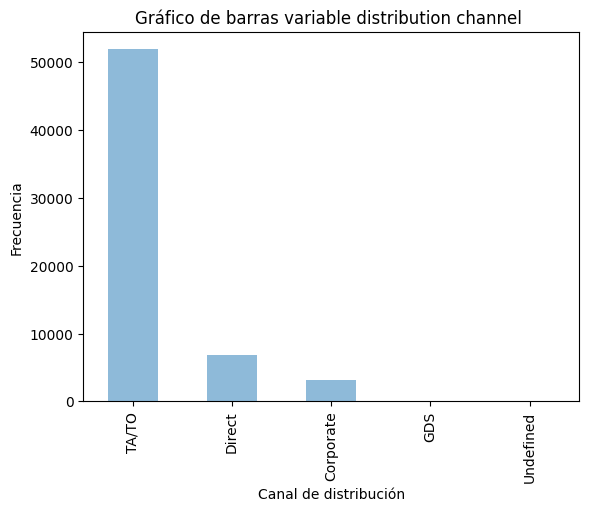

In [ ]:
variables_cualitativas.distribution_channel.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable distribution channel " , xlabel="Canal de distribución" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

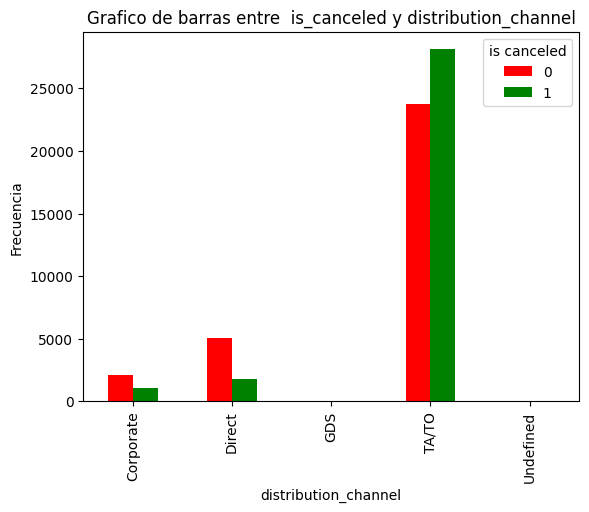

In [ ]:
table = pd.crosstab(df_hotels_train_copy['distribution_channel'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y distribution_channel')
plt.legend(title='is canceled')

plt.show()

#### **is_repeated_guest**

Esta variable nos indica si el huesped es repetido. Toma los valores de 1 si está repetido o 0 si no. Puede resultar muy interesante a la hora de analizar cancelaciones.

In [ ]:
variables_cualitativas.is_repeated_guest.value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable is repeated guest '}, xlabel='Huesped repetido', ylabel='Frecuencia'>

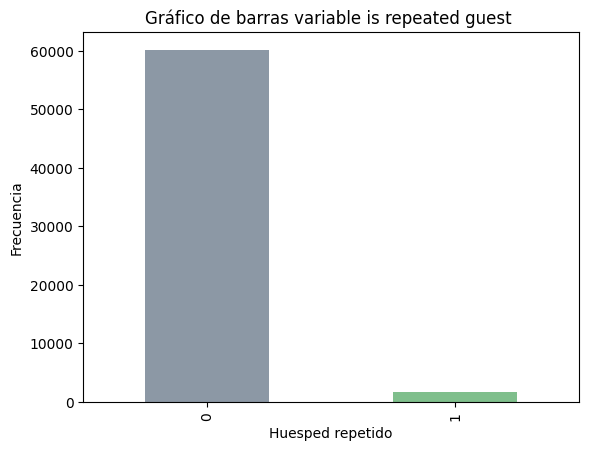

In [ ]:
colores=[(0.1, 0.2, 0.3),(0, 0.5, 0.1)]
variables_cualitativas.is_repeated_guest.value_counts().plot.bar(alpha=0.5 , color=colores, title="Gráfico de barras variable is repeated guest " , xlabel="Huesped repetido" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

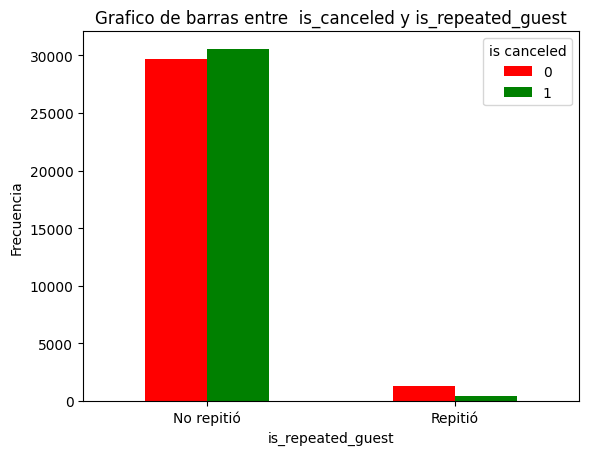

In [ ]:
table = pd.crosstab(df_hotels_train_copy['is_repeated_guest'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])
ax.set_xticklabels(['No repitió', 'Repitió'], rotation=0)
ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y is_repeated_guest')
plt.legend(title='is canceled')

plt.show()

Observemos esto porcentualmente

<Figure size 1x1 with 0 Axes>

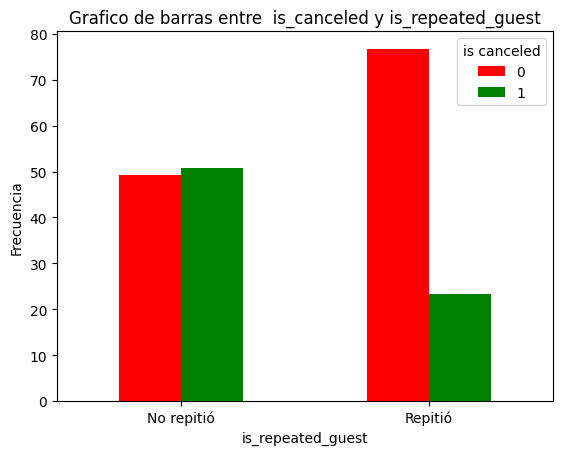

In [ ]:
table = pd.crosstab(df_hotels_train_copy['is_repeated_guest'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_xticklabels(['No repitió', 'Repitió'], rotation=0)
ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre  is_canceled y is_repeated_guest')
plt.legend(title='is canceled')

plt.show()

Hay una clara relación en si un cliente ya tuvo una reserva anteriormente, y si la actual esta o no cancelada.
Por lo que vemos las reservas actuales de clientes que tuvieron reservas previas en su mayoría no estan canceladas.

#### **deposit_type**


Esta variable indica si el cliente hizo un depósito para asegurar la  reserva. Puede tomar los valores de:

*   No deposit - Ningún depósito fue hecho
*   Non refund - se depositó el valor total del costo total de la estadía.   
*   Refundable - se depositó un valor menor al costo total de la estadía


In [ ]:
variables_cualitativas.deposit_type.value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

Podemos observar que hay muy pocos Refundable.

<Axes: title={'center': 'Gráfico de barras variable deposit type '}, xlabel='tipo deposito', ylabel='Frecuencia'>

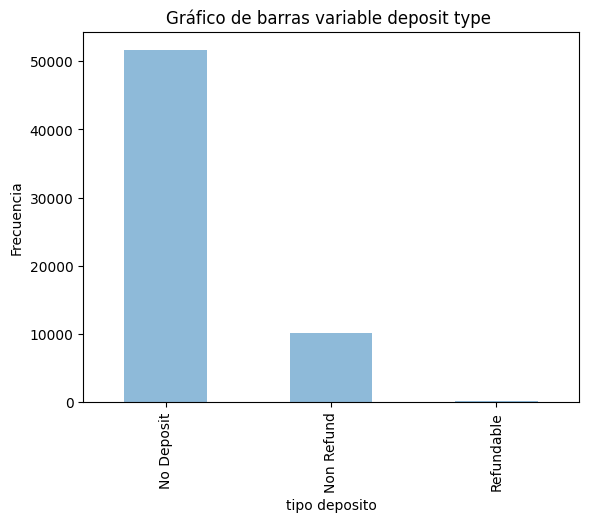

In [ ]:
variables_cualitativas.deposit_type.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable deposit type " , xlabel="tipo deposito" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

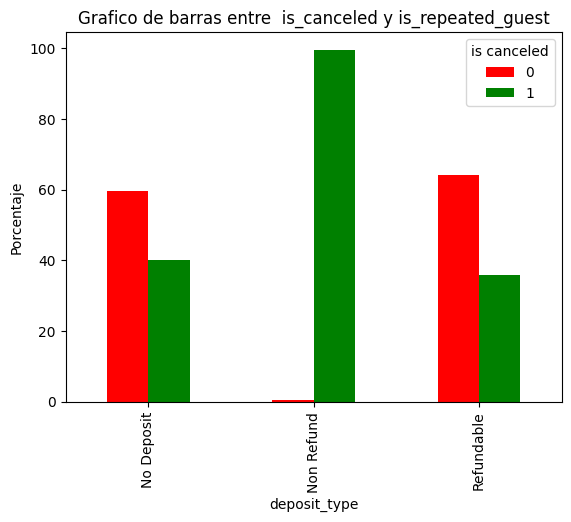

In [ ]:
table = pd.crosstab(df_hotels_train_copy['deposit_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])


ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre deposit_type y is_repeated_guest')
plt.legend(title='is canceled')

plt.show()

Observamos algo llamativo a partir de este gráfico, las personas que realizar un deposito del valor total del costo de la estadía, tienen la reserva cancelada.

Contrario a lo que esperaríamos mediante la lógica, debido a que si alguien ya pago el total, por que cancelaría la reserva.

####**deposit_boolean**
Si hizo un depósito (total o parcial) va 1. Sino 0

In [ ]:

df_hotels_train_copy['deposit_boolean'] = [1]*len(df_hotels_train_copy)

df_hotels_train_copy.loc[df_hotels_train_copy['deposit_type'] == 'No Deposit', 'deposit_boolean'] = 0


df_hotels_train_copy.deposit_boolean.value_counts()


0    51685
1    10228
Name: deposit_boolean, dtype: int64

In [ ]:
df_filtrado_deposit = df_hotels_train_copy[df_hotels_train_copy['deposit_boolean'] == 1]

df_filtrado_deposit.deposit_boolean.value_counts()

df_filtrado_deposit.is_canceled.value_counts()

1    10141
0       87
Name: is_canceled, dtype: int64

In [ ]:
(df_filtrado_deposit.is_canceled.sum()) / (df_filtrado_deposit.deposit_boolean.sum())

0.9914939382088385

Más del 99% de los clientes que eligieron depositar dinero canceló.

<Figure size 200x200 with 0 Axes>

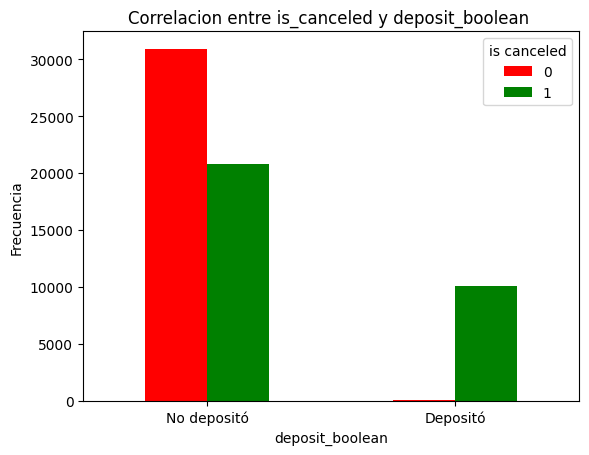

In [ ]:
table = pd.crosstab(df_hotels_train_copy['deposit_boolean'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(2, 2))

ax = table.plot.bar(stacked=False, color=['red', 'green'])


ax.set_xticklabels(['No depositó', 'Depositó'], rotation=0)
ax.set_ylabel('Frecuencia')


plt.title('Correlacion entre is_canceled y deposit_boolean ')
plt.legend(title='is canceled')

plt.show()


Podemos observar como este fenómeno va en contra de lo que se creería mediante la lógica, ya que pensaríamos que al depositar, el cliente sería menos propensos a cancelar.

#### **reserved_room_type** 

Esta variable indica el código del tipo de habitación reservada

In [ ]:
variables_cualitativas.reserved_room_type.value_counts()

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable reserved room type '}, xlabel='tipo de habitacion reservada', ylabel='Frecuencia'>

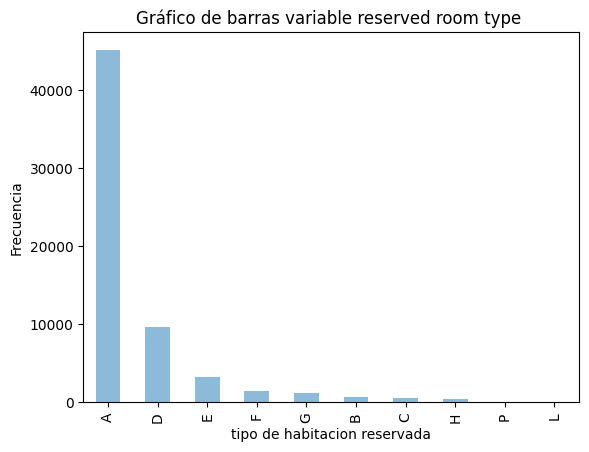

In [ ]:
variables_cualitativas.reserved_room_type.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable reserved room type " , xlabel="tipo de habitacion reservada" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

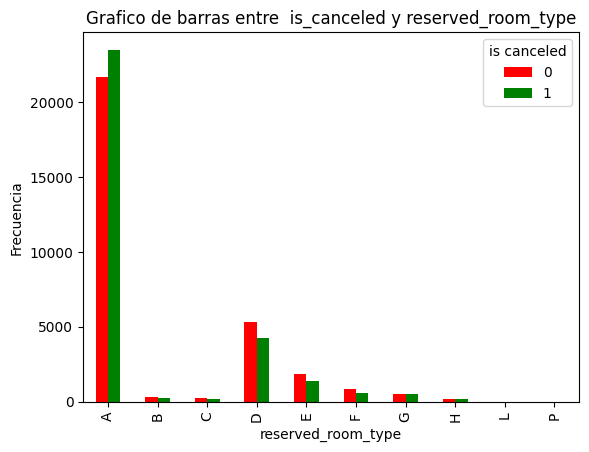

In [ ]:
table = pd.crosstab(df_hotels_train_copy['reserved_room_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y reserved_room_type')
plt.legend(title='is canceled')

plt.show()

#### **assigned_room_type**

Esta variable indica el código del tipo de habitación asignada. Podemos analizar si afecta el hecho de reservar un tipo de habitación y que se te asigne otro.

In [ ]:
variables_cualitativas.assigned_room_type.value_counts()

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable assigned room type '}, xlabel='tipo de habitacion asignada', ylabel='Frecuencia'>

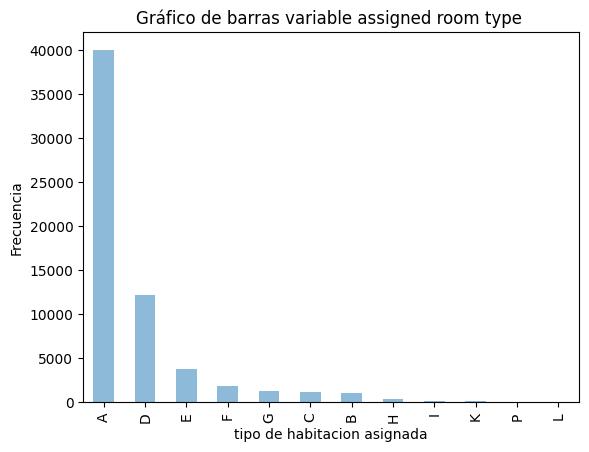

In [ ]:
variables_cualitativas.assigned_room_type.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable assigned room type " , xlabel="tipo de habitacion asignada" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

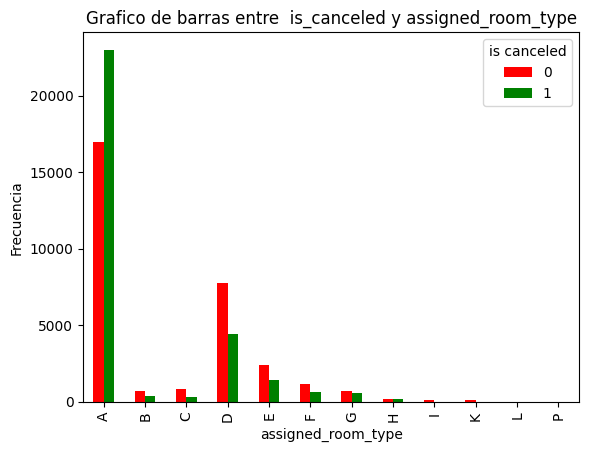

In [ ]:
table = pd.crosstab(df_hotels_train_copy['assigned_room_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y assigned_room_type')
plt.legend(title='is canceled')

plt.show()



Estaría interesante ver la relación de si un cliente canceló con una variable que indique si se le realizó cambio de tipo de habitacón respecto a la reservada

#### had_room_type_change

In [ ]:
df_train_con_had_change = df_hotels_train_copy.copy()
df_train_con_had_change['had_room_type_change'] = [1]*len(df_train_con_had_change)

df_train_con_had_change.loc[df_train_con_had_change['reserved_room_type'] == df_train_con_had_change['assigned_room_type'], 'had_room_type_change'] = 0


df_train_con_had_change.had_room_type_change.value_counts()

0    55489
1     6424
Name: had_room_type_change, dtype: int64

La mayoría no tuvo cambios en la habítacion asignada respecto a la reservada. Pero veamos como afecta el hecho de que se les haya cambiado la habitación.


<Figure size 1x1 with 0 Axes>

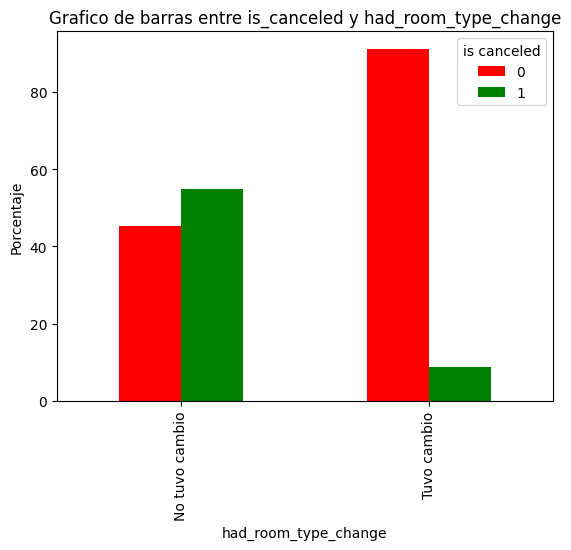

In [ ]:
table = pd.crosstab(df_train_con_had_change['had_room_type_change'], df_train_con_had_change['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_xticklabels(['No tuvo cambio','Tuvo cambio'])
ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y had_room_type_change')
plt.legend(title='is canceled')

plt.show()

Observamos como la mayoría de los clientes que tuvo un cambio en la habitación, no tiene la reserva cancelada.
Será que los cambios de habitación por manejos administrativos del hotel se realizan en su gran mayoría se realizan al momento que hace check in el cliente? Y al haber hecho check in, esa reserva ya no será una reserva cancelada.

#### **agent** 

Esta variable indica el ID de la agencia de viaje que efectuó la reserva

In [ ]:
variables_cualitativas.agent.value_counts()

7890

<Figure size 1x1 with 0 Axes>

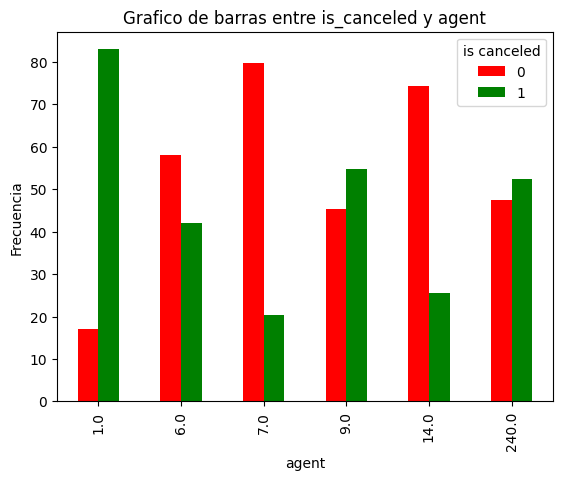

In [ ]:
top_6_agent = df_hotels_train_copy['agent'].value_counts().head(6)
df_top_6_agent = df_hotels_train_copy[df_hotels_train_copy['agent'].isin(top_6_agent.index)]

table = pd.crosstab(df_top_6_agent['agent'], df_top_6_agent['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre is_canceled y agent')
plt.legend(title='is canceled')

plt.show()

Observamos como para algunas agencias hay mayor cantidad de cancelaciones mientras que para otras, mayor cantidad de no cancelaciones.

#### **company**


Esta variable indica el ID de la entidad responsable de abonar la reserva

In [ ]:
df_hotels_train_copy.company.value_counts()

0.0      58608
40.0       390
223.0      364
67.0       169
45.0       118
         ...  
282.0        1
349.0        1
200.0        1
126.0        1
160.0        1
Name: company, Length: 274, dtype: int64

<Figure size 1x1 with 0 Axes>

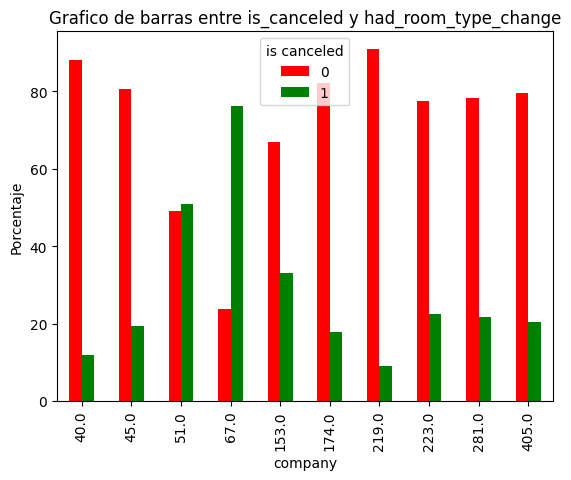

In [ ]:
top_10_companies = df_hotels_train_copy['company'].value_counts().head(10)
df_top_10_companies = df_hotels_train_copy[df_hotels_train_copy['company'].isin(top_10_companies.index)]

table = pd.crosstab(df_top_10_companies['company'], df_top_10_companies['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y top 10 companies en frecuencia')
plt.legend(title='is canceled')

plt.show()

La mayoría de las compañias en el top 10 de frecuencia estan asignadas a reservas no canceladas, excepto por la company 51, donde esta bastante parejo.
Y la company de id 67, presenta el fenómeno opuesto.

####**company_boolean**

In [ ]:
df_hotels_train_copy['company_boolean'] = [1]*len(df_hotels_train_copy)

df_hotels_train_copy.loc[df_hotels_train_copy['company'] == 0, 'company_boolean'] = 0


df_hotels_train_copy.company_boolean.value_counts()


1    61913
Name: company_boolean, dtype: int64

In [ ]:
df_filtrado_company = df_hotels_train_copy[df_hotels_train_copy['company_boolean'] == True]

df_filtrado_company.company_boolean.value_counts()

df_filtrado_company.is_canceled.value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

In [ ]:
(df_filtrado_company.is_canceled.sum()) * 100 / (df_filtrado_company.company_boolean.sum())

49.9749648700596

<Figure size 1x1 with 0 Axes>

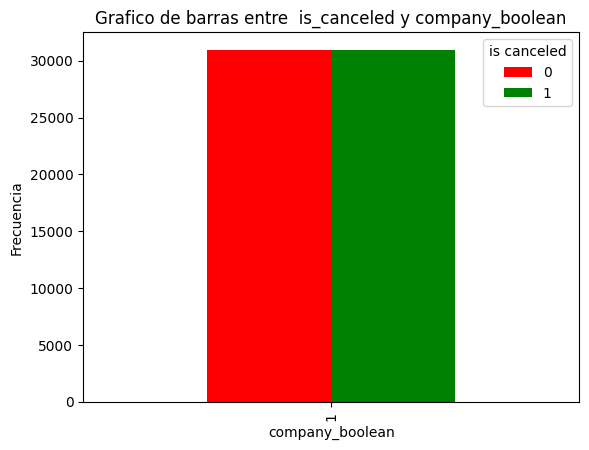

In [ ]:
table = pd.crosstab(df_hotels_train_copy['company_boolean'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y company_boolean')
plt.legend(title='is canceled')

plt.show()

#### **customer_type**





Puede tomar los valores de:

*   Contract - cuando la reserva tiene un allotment o cualquier otro tipo de contrato asociado.
*   Group - cuando la reserva esta asociada a un grupo
*   Transient - cuando la reserva no esta asociada ni a un contrato, ni a un grupo, ni a ninguna otra reserva transiente.
*   Transient-Party cuando la reserva es transiente pero esta asociada al menos a otra reserva transiente

In [ ]:
variables_cualitativas.customer_type.value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable customer type '}, xlabel='tipo de huesped', ylabel='Frecuencia'>

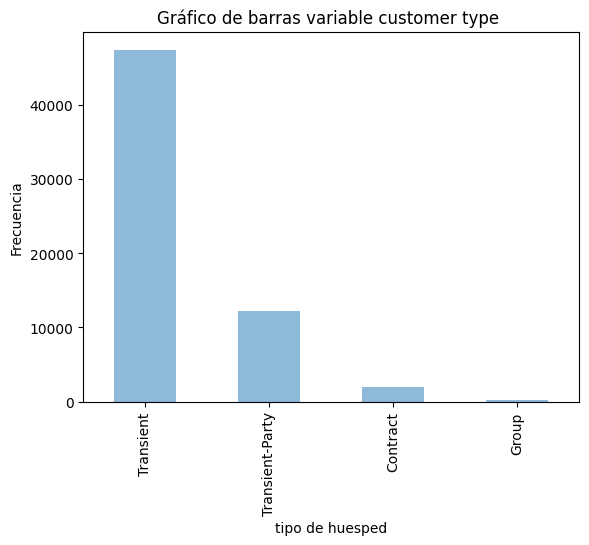

In [ ]:
variables_cualitativas.customer_type.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable customer type " , xlabel="tipo de huesped" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

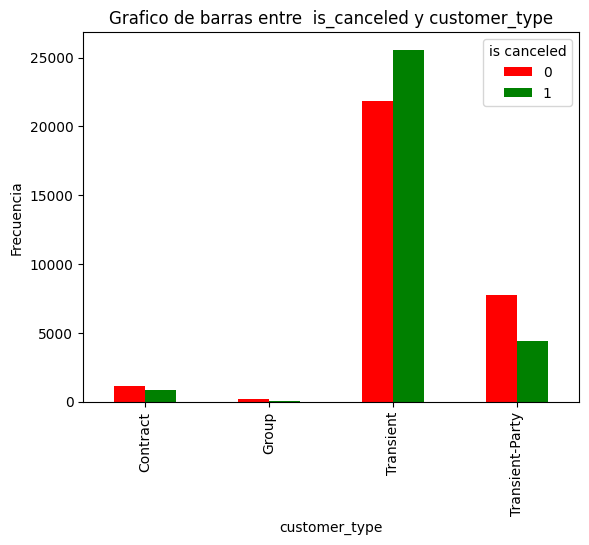

In [ ]:
table = pd.crosstab(df_hotels_train_copy['customer_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y customer_type')
plt.legend(title='is canceled')

plt.show()



#### **id**

Esta variable indica el número de identificación único en la reserva

In [ ]:
variables_cualitativas.id.head()

0    7aa4cc6b-b92c-4061-b21d-4f9e0cac4689
1    b1428f80-c56c-4ae4-91a9-6962edae08b1
2    2226c018-ea20-4c4e-8f71-ea66aee70d7c
3    314f56dc-2e4d-4298-9bdd-27bb008bffff
4    28c75445-c603-413a-babf-ad377018b592
Name: id, dtype: object

Verificamos si hay clientes repetidos

In [ ]:
df_hotels_train_original[df_hotels_train_original.duplicated(keep=False, subset = ['id'])]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status_date, id, is_canceled]
Index: []

[0 rows x 32 columns]

#### **is_canceled** 

Es la variable que estaremos tratando de predecir, indica si la reserva esta (1) o no cancelada (0)

In [ ]:
df_hotels_train_original.is_canceled.value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

Observamos que esta bastante parejo en cantidad entre reservas canceladas y no canceladas

<Axes: title={'center': 'Gráfico de barras variable is canceled '}, xlabel='is_canceled', ylabel='Frecuencia'>

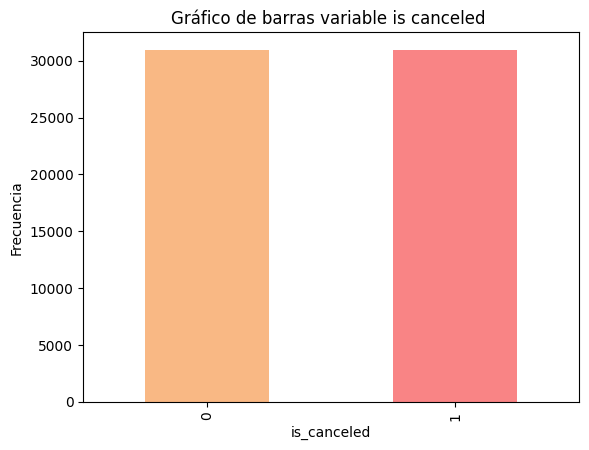

In [ ]:
colores=[(0.960, 0.447, 0.039),(0.960, 0.039, 0.050)]
variables_cualitativas.is_canceled.value_counts().plot.bar(alpha=0.5 , color=colores, title="Gráfico de barras variable is canceled " , xlabel="is_canceled" , ylabel="Frecuencia")

#### Comentario

No se realizaron gráficos de las variables que indican un código, ya que los mismos son valores únicos (a cada uno le corresponde una única fila en el dataset), por lo que no tendría sentido realizar un gráfico dado que tendríamos 'x' cantidad de valores en el eje x con un único valor en el eje y.

### Valores nulos respecto a las variables cualitativas

Entre estos tipos de variables, tenemos 3 que poseen valores nulos, las cuales son:

**country: 221** 

**agent: 7890** 

**company: 58761**

Además deberemos analizar que hacemos con los valores como Undefined, SC, valores que no tienen sentido, etc.

#### Country

Primero comenzamos revisando las filas que tienen estos valores nulos:



*   Para la variable **Country**



In [ ]:
cantidad_de_countries_nulos= variables_cualitativas.country.isna().sum()
cantidad_de_countries_nulos

221

In [ ]:
#Porcentaje de nulos
(cantidad_de_countries_nulos * 100) / variables_cualitativas.shape[0]

0.3569524978599002

Son muy pocos. Representan menos del 1%. Analizar si podemos encontrar una relación con Agent o con Company. En ese caso quizás conviene completar con datos parecidos (multivariada). Sino completar con "Otro país".

Como vemos hay 221 reservas con NaN como país.

Es un poco porcentaje, pero analizemos si es que estos pocos nulos tienen una alta tasa de cancelamiento.

In [ ]:
cantidad_reservas_canceladas_con_paises_nulos = (df_hotels_train_copy[df_hotels_train_copy['country'].isna()]['is_canceled'] == 0).sum()
cantidad_reservas_no_canceladas_con_paises_nulos = (df_hotels_train_copy[df_hotels_train_copy['country'].isna()]['is_canceled'] == 1).sum()
df_hotels_train_copy[df_hotels_train_copy['country'].isna()]['is_canceled'].value_counts()

Series([], Name: is_canceled, dtype: int64)

In [ ]:
#Porcentaje de cancelaciones con paises NaN
(cantidad_reservas_canceladas_con_paises_nulos * 100) / cantidad_de_countries_nulos

0.0

In [ ]:
#Porcentaje de  no cancelaciones con paises NaN
(cantidad_reservas_no_canceladas_con_paises_nulos * 100) / cantidad_de_countries_nulos

0.0

Por más que haya un 77% de reservas que no son canceladas cuando el país es nulo, son muy poca cantidad de datos como para asumir algo. Por lo que eliminaremos las filas con paises nulos.

In [ ]:
df_hotels_train_copy=df_hotels_train_copy.dropna(subset=['country'])
df_hotels_train_copy['country'].isna().sum()

0

####Agent



*   Para la variable **agent**



In [ ]:
cantidad_de_agents_nulos = variables_cualitativas.agent.isna().sum()
cantidad_de_agents_nulos

7890

In [ ]:
#Porcentaje de nulos
(cantidad_de_agents_nulos * 100) / variables_cualitativas.shape[0]

12.743688724500508

Procedemos a agregar una categoría nueva: "Sin agente", representada con el id 0.
Es el 13% aproximadamente. Es un porcentaje no despreciable. 

In [ ]:
df_hotels_train_copy['agent'] = df_hotels_train_copy['agent'].fillna(0)

Analizemos un gráfico visto anteriormente, pero con los nuevos datos.

<Figure size 1x1 with 0 Axes>

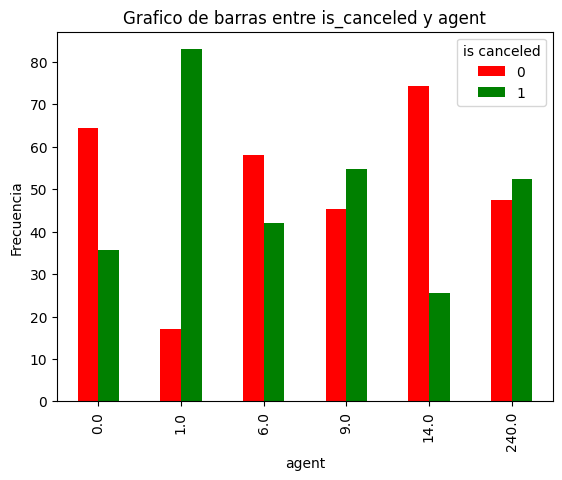

In [ ]:
top_6_agent = df_hotels_train_copy['agent'].value_counts().head(6)
df_top_6_agent = df_hotels_train_copy[df_hotels_train_copy['agent'].isin(top_6_agent.index)]

table = pd.crosstab(df_top_6_agent['agent'], df_top_6_agent['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y agent')
plt.legend(title='is canceled')

plt.show()

Observamos como la mayoría de reservas sin agente, no son canceladas.

#### Company


*   Para la variable **company**






In [ ]:
cantidad_de_company_nulos = variables_cualitativas.company.isna().sum()

Variable con mucha cantidad de nulos en relación con la cantidad de filas, vemos que el 94,9% de las reservas tienen company null

In [ ]:
#Porcentaje de nulos
(cantidad_de_company_nulos * 100) / variables_cualitativas.shape[0]

94.90898518889409

A pesar de que el 94% de los datos son nulos en el paper se aclara, que esto hace referencia a que la reserva no tiene una compañia asociada. Este nulo no hace referencia a valor faltante o mal cargado, por lo que decidimos dejar una categoria SIN COMPANY, representada por el id 0.

Valores nulos en company antes:

In [ ]:
cantidad_de_company_nulos = variables_cualitativas.company.isna().sum()
cantidad_de_company_nulos

In [ ]:
top_6_company = df_hotels_train_copy['company'].value_counts().head(6)
df_top_6_company = df_hotels_train_copy[df_hotels_train_copy['company'].isin(top_6_company.index)]

table = pd.crosstab(df_top_6_company['company'], df_top_6_company['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y company')
plt.legend(title='is canceled')

plt.show()

#### Analisis de caracteres especiales que representen nulo en las features

Analizamos presencia de "-" como valor

In [ ]:
tienen_caracter_invalido = variables_cualitativas.astype('str').eq('-').any(0)
tienen_caracter_invalido

<ipython-input-259-47143a7a25a5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tienen_caracter_invalido = variables_cualitativas.astype('str').eq('-').any(0)


agent                   False
arrival_date_month      False
assigned_room_type      False
company                 False
country                 False
customer_type           False
deposit_type            False
distribution_channel    False
hotel                   False
is_canceled             False
id                      False
is_repeated_guest       False
market_segment          False
meal                    False
reserved_room_type      False
dtype: bool

Analizamos si una variable cualitativa fue cargada como valor numérico 0 para representar un Null. Finalmente solo lo encontramos en las 2 columnas que tiene sentido que haya 0s.

In [ ]:
(variables_cualitativas == 0).any().to_frame('Valor 0')

Valor 0
agent                   False
arrival_date_month      False
assigned_room_type      False
company                 False
country                 False
customer_type           False
deposit_type            False
distribution_channel    False
hotel                   False
is_canceled              True
id                      False
is_repeated_guest        True
market_segment          False
meal                    False
reserved_room_type      False

  Analizamos presencia de "Undefined"

In [ ]:
tienen_undefined = variables_cualitativas.astype('str').eq('Undefined').any(0)
tienen_undefined



<ipython-input-261-cdd328332b37>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tienen_undefined = variables_cualitativas.astype('str').eq('Undefined').any(0)


agent                   False
arrival_date_month      False
assigned_room_type      False
company                 False
country                 False
customer_type           False
deposit_type            False
distribution_channel     True
hotel                   False
is_canceled             False
id                      False
is_repeated_guest       False
market_segment           True
meal                     True
reserved_room_type      False
dtype: bool

*Distribution Channel*, *Market Segment* y *Meal* tienen undefined

Analizamos presencia de valores SC. Vemos que la única variable con SC es Meal. SC puede ser reemplazado por Undefined, significan lo mismo.

In [ ]:
tienen_sc = variables_cualitativas.astype('str').eq('SC').any(0)
tienen_sc

<ipython-input-262-0c35ccf48869>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tienen_sc = variables_cualitativas.astype('str').eq('SC').any(0)


agent                   False
arrival_date_month      False
assigned_room_type      False
company                 False
country                 False
customer_type           False
deposit_type            False
distribution_channel    False
hotel                   False
is_canceled             False
id                      False
is_repeated_guest       False
market_segment          False
meal                     True
reserved_room_type      False
dtype: bool

Ahora procederemos a analizar cada una de estas variables (que presentan valores nulos o no definidos) y realizaremos los cambios pertinentes

####**Distribution Channel**

In [ ]:
distribution_tiene_undefined = variables_cualitativas.distribution_channel.astype('str').eq('Undefined').sum()
distribution_tiene_undefined

4

Al ser solo 4 filas de 61913, eliminaremos las columnas de Distribution channel con valores nulos.

In [ ]:
df_hotels_train_copy = df_hotels_train_copy[df_hotels_train_copy["distribution_channel"].str.contains("Undefined") == False]
df_hotels_train_copy["distribution_channel"].astype('str').eq('Undefined').sum()


0

####**Meal**

In [ ]:
meal_tiene_undefined = variables_cualitativas.meal.astype('str').eq('Undefined').sum()
meal_tiene_sc = variables_cualitativas.meal.astype('str').eq('SC').sum()
print ("Undefined:",meal_tiene_undefined)
print ("SC:",meal_tiene_sc)
total_nulos= meal_tiene_undefined + meal_tiene_sc
print ("Total= " ,total_nulos)

Undefined: 591
SC: 5556
Total=  6147


In [ ]:
#Porcentaje de nulos
(total_nulos * 100) / variables_cualitativas.shape[0]

9.928447983460662

Reemplazamos los valores de SC Por Undefined, ya que represetan lo mismo. (Ningun plan de comidas asignado)

In [ ]:
df_hotels_train_copy['meal']=df_hotels_train_copy['meal'].replace('SC','Undefined')
df_hotels_train_copy.reset_index(drop=True, inplace=True)

In [ ]:
meal_tiene_undefined_ahora = df_hotels_train_copy.meal.astype('str').eq('Undefined').sum()
meal_tiene_sc_ahora = df_hotels_train_copy.meal.astype('str').eq('SC').sum()
print ("Undefined:",meal_tiene_undefined_ahora)
print ("SC:",meal_tiene_sc_ahora)
print ("Total= " ,meal_tiene_undefined_ahora + meal_tiene_sc_ahora)

Undefined: 6140
SC: 0
Total=  6140


Aca el valor Undefined representa que no le aplica ninguno de los otros planes de comida, no es un valor faltante.

####**Market Segment**

In [ ]:
market_tiene_undefined = variables_cualitativas.market_segment.astype('str').eq('Undefined').sum()
market_tiene_undefined

2

Al ser solo 2 filas que contienen market segment nulo de 61913, procedemos a eliminarlas.

In [ ]:
df_hotels_train_copy = df_hotels_train_copy[df_hotels_train_copy["market_segment"].str.contains("Undefined") == False]
df_hotels_train_copy.market_segment.astype('str').eq('Undefined').sum()

0

58761

In [ ]:
df_hotels_train_copy['company'] = df_hotels_train_copy['company'].fillna(0)

Valores nulos en company ahora:

In [ ]:
cantidad_de_company_nulos_copy = df_hotels_train_copy.company.isna().sum()
cantidad_de_company_nulos_copy

0

Ya no hay valores nulos. Al ser IDs, no nos parece relevante calcular la mediana, media, etc.

## Variables cuantitativas



|Columna|Tipo de Variable|Descripción|
|----------|--------------|---------------|
|ADR|Numérica|Tarifa diaria promedio (Average Daily Rate) definida por American Hotel & Lodging Association|
|Adults|Entero|Número de adultos|
|ArrivalDateDayOfMonth|Entero|Día del mes de la fecha de llegada|
|ArrivalDateWeekNumber|Entero|Número de la semana de la fecha de llegada|
|ArrivalDateYear|Entero|Año de la fecha de llegada|
|Babies|Entero|Número de bebés|
|BookingChanges|Entero|Número de cambios hechos en la reserva desde el día en que se hizo hasta el check-in o cancelación de la misma|
|Children|Entero|Número de niños|
|DaysInWaitingList|Entero|Número de días en que la reserva estuvo en la lista de espera|
|LeadTime|Entero|Número de días que pasaron entre la fecha de entrada de la reserva al PMS (Property Management System) y la fecha de llegada|
|PreviousBookingsNotCanceled|Entero|Número de reservas previas sin cancelar|
|PreviousCancellations|Entero|Número de reservas previas canceladas|
|RequiredCardParkingSpaces|Entero|Número de estacionamientos requeridos por el cliente|
|ReservationStatusDate|Categórica|Fecha del último estado actualizado de la reserva|
|StaysInWeekNights|Entero|Número de noches de semana en la reserva|
|StaysInWeekendNights|Entero|Número de noches de fin de semana en la reserva|
|TotalOfSpecialRequests|Entero|Número de requerimientos especiales del huespéd|


### Analizamos la cantidad de apariciones de cada una de las variables

Generamos un nuevo DataFrame para poder analizarlas: 


In [ ]:
variables_cuantitativas = pd.DataFrame(data = df_hotels_train_copy, columns = ["adr", "adults", "arrival_date_day_of_month", "arrival_date_week_number","arrival_date_year",
                                                                                  "babies","booking_changes","children","days_in_waiting_list","lead_time","previous_cancellations",
                                                                                  "previous_bookings_not_canceled","required_car_parking_spaces","reservation_status_date",
                                                                                  "stays_in_week_nights","stays_in_weekend_nights","total_of_special_requests"])
variables_cuantitativas

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
0      115.50       1                          5                        37   
1       42.00       2                         31                        44   
2      229.00       2                         13                        42   
3       75.00       2                         12                        51   
4       75.00       2                         19                        12   
...       ...     ...                        ...                       ...   
61908   48.00       2                         27                         4   
61909  149.00       1                          2                        36   
61910   95.00       1                          8                        19   
61911   36.05       2                         10                        41   
61912  143.29       2                         17                        17   

       arrival_date_year  babies  booking_changes  children  \
0                   2016       0                0       0.0   
1                   2015       0                0       0.0   
2                   2016       0                0       2.0   
3                   2016       0                0       0.0   
4                   2017       0                0       0.0   
...                  ...     ...              ...       ...   
61908               2017       0                0       0.0   
61909               2016       0                0       0.0   
61910               2017       0                0       0.0   
61911               2015       0                0       0.0   
61912               2016       0                1       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
0                         0         49                       0   
1                         0          4                       0   
2                         0         25                       0   
3                         0         26                       0   
4                         0        104                       0   
...                     ...        ...                     ...   
61908                     0         24                       0   
61909                     0          0                       0   
61910                     0         10                       0   
61911                     0        143                       0   
61912                     0         57                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
0                                   0                            0   
1                                   0                            1   
2                                   0                            0   
3                                   0                            0   
4                                   0                            0   
...                               ...                          ...   
61908                               0                            0   
61909                               0                            0   
61910                               0                            0   
61911                               0                            0   
61912                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
0                  2016-08-25                     2                        1   
1                  2015-11-01                     1                        0   
2                  2016-10-14                     1                        0   
3                  2016-11-29                     5                        2   
4                  2017-03-26                     5                        2   
...                       ...                   ...                      ...   
61908              2017-01-23                     2                        0   
61909              2016-09-03             

#### **ADR**

Esta variable indica la tarifa diaria promedio (Average Daily Rate) definida por American Hotel & Lodging Association

In [ ]:
variables_cuantitativas.adr.value_counts()

62.00     2396
75.00     1500
90.00     1439
65.00     1188
80.00     1085
          ... 
65.86        1
246.50       1
109.71       1
72.09        1
131.47       1
Name: adr, Length: 6142, dtype: int64

In [ ]:
variables_cuantitativas.adr.sort_values()

21044     -6.38
2337       0.00
51894      0.00
5228       0.00
27314      0.00
          ...  
59851    402.00
8653     426.25
53810    437.00
50065    450.00
55265    510.00
Name: adr, Length: 61688, dtype: float64

Vemos que hay un solo valor negativo, que podría llegar a ser un dato mal cargado o mal calculado, debido a que gastar negativo no tendría sentido en este contexto. Por lo que lo reemplazaremos por la media

In [ ]:
variables_cuantitativas.adr.describe()

count    61688.000000
mean       102.533874
std         47.708637
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

In [ ]:
mean = df_hotels_train_copy['adr'].mean()
df_hotels_train_copy.loc[df_hotels_train_copy['adr'] < 0, 'adr'] = mean

[Text(0.5, 1.0, 'Distribución de adr (average daily rate)'),
 Text(0.5, 0, 'Cantidad promedio diaría gastada por el cliente'),
 Text(0, 0.5, 'Frecuencia')]

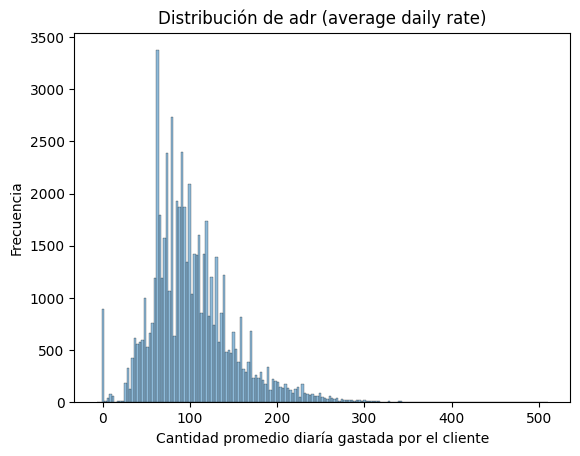

In [ ]:
sns.histplot(data=variables_cuantitativas['adr'], alpha = 0.5).set(title="Distribución de adr (average daily rate)",xlabel="Cantidad promedio diaría gastada por el cliente",ylabel="Frecuencia")

#### **lead_time**

Esta variable indica el número de días que pasaron entre la fecha de entrada de la reserva al PMS (Property Management System) y la fecha de llegada

In [ ]:
variables_cuantitativas.lead_time.value_counts()

0      2714
1      1498
2       882
3       802
4       783
       ... 
371       1
375       1
399       1
424       1
400       1
Name: lead_time, Length: 472, dtype: int64

[Text(0.5, 1.0, 'Distribución de lead time'),
 Text(0.5, 0, 'lead time'),
 Text(0, 0.5, 'Frecuencia')]

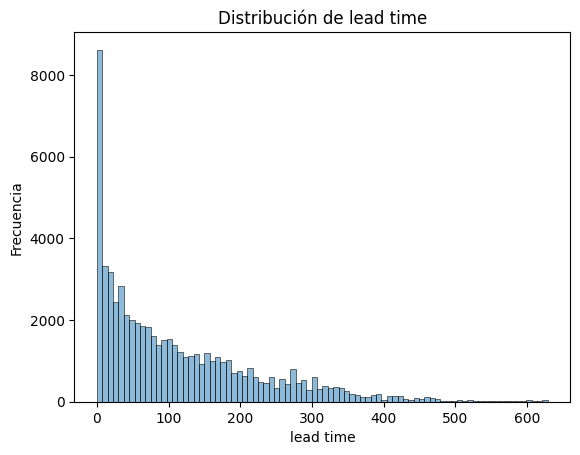

In [ ]:
sns.histplot(data=variables_cuantitativas['lead_time'], alpha = 0.5).set(title="Distribución de lead time",xlabel="lead time",ylabel="Frecuencia")

Text(0, 0.5, 'lead_time')

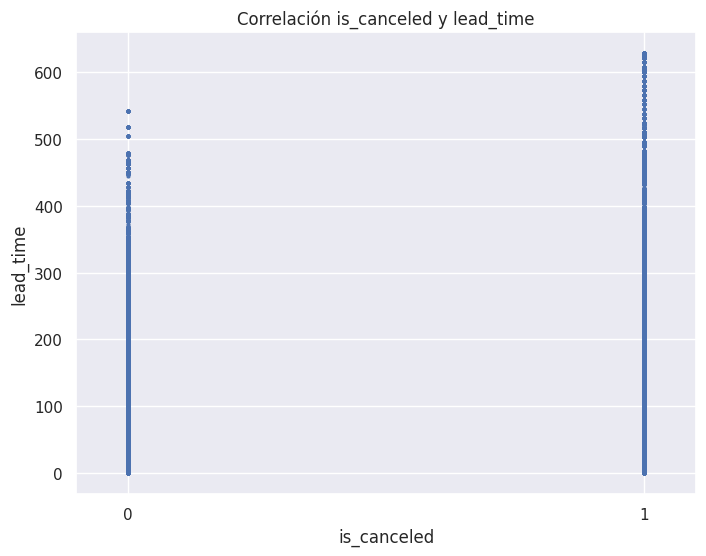

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['lead_time'], s=4)

plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)

plt.title('Correlación is_canceled y lead_time')
plt.xlabel('is_canceled')
plt.ylabel('lead_time')


Podemos ver que a partir de los 400 días aumenta mucho la cantidad la cancelaciones

#### **arrival_date_year** 

Esta variable indica el año de la fecha de llegada

In [ ]:
variables_cuantitativas.arrival_date_year.value_counts()

2016    29243
2017    21030
2015    11415
Name: arrival_date_year, dtype: int64

Observamos como la mayor cantidad de arríbos fue en 2016, pero en esta variable hay que tener en cuenta que los datos son desde el 1 de Julio de 2015 hasta el 31 de Agosto de 2017. Sabiendo esto 2017 tiene una cantidad considerable de arribos, para estar englobado en una cantidad menor de meses. Sería quizas interesante mas adelante calcular la cantidad de arribos por mes.

<Axes: title={'center': 'Gráfico de barras variable arrival date year '}, xlabel='Año', ylabel='Frecuencia'>

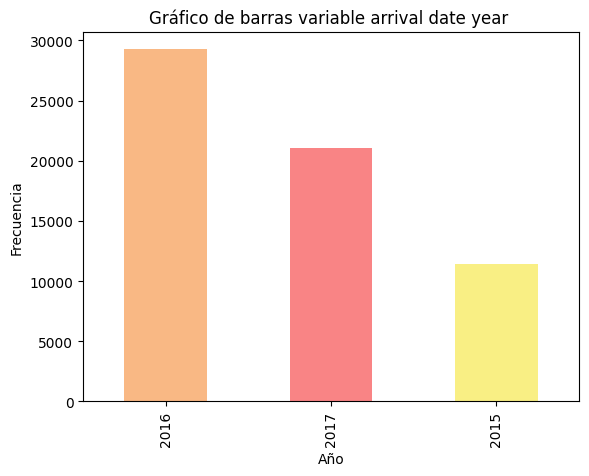

In [ ]:
colores=[(0.960, 0.447, 0.039),(0.960, 0.039, 0.050), (0.960, 0.878, 0.039)]
variables_cuantitativas.arrival_date_year.value_counts().plot.bar(alpha=0.5 , color=colores, title="Gráfico de barras variable arrival date year " , xlabel="Año" , ylabel="Frecuencia")

#### **arrival_date_week_number**

Esta variable indica el número de semana de la fecha de llegada

In [ ]:
variables_cuantitativas.arrival_date_week_number.max()

53

In [ ]:
variables_cuantitativas.arrival_date_week_number.value_counts()

33    1869
30    1606
18    1603
32    1596
17    1546
34    1533
28    1486
21    1465
20    1464
38    1454
41    1447
42    1434
29    1421
25    1409
31    1394
15    1377
22    1370
39    1364
23    1359
27    1356
24    1351
35    1304
40    1268
13    1255
16    1249
26    1231
43    1219
19    1195
14    1184
8     1167
37    1163
44    1158
36    1151
10    1083
9     1077
7     1068
45    1034
11    1025
12     987
53     966
49     914
46     833
47     779
50     776
4      725
6      724
48     720
3      662
5      649
2      640
52     572
1      549
51     457
Name: arrival_date_week_number, dtype: int64

[Text(0.5, 1.0, 'Distribución de arrival date week number'),
 Text(0.5, 0, 'arrival date week number'),
 Text(0, 0.5, 'Frecuencia')]

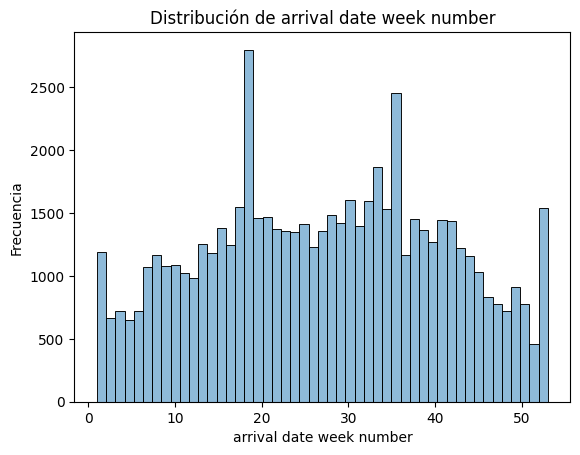

In [ ]:
sns.histplot(data=variables_cuantitativas['arrival_date_week_number'], alpha = 0.5).set(title="Distribución de arrival date week number",xlabel="arrival date week number",ylabel="Frecuencia")

#### **arrival_date_day_of_month** 

Esta variable indica la fecha del dia del mes de llegada

In [ ]:
variables_cuantitativas.arrival_date_day_of_month.value_counts()

17    2299
5     2258
15    2178
16    2172
9     2163
26    2149
12    2116
25    2105
19    2073
2     2072
20    2070
28    2070
24    2063
8     2049
3     2026
30    2021
18    2015
27    2009
14    2001
6     1959
7     1945
4     1930
1     1901
21    1894
13    1892
22    1876
29    1845
23    1841
10    1803
11    1768
31    1125
Name: arrival_date_day_of_month, dtype: int64

[Text(0.5, 1.0, 'Distribución de arrival date day of month'),
 Text(0.5, 0, 'date day of month'),
 Text(0, 0.5, 'Frecuencia')]

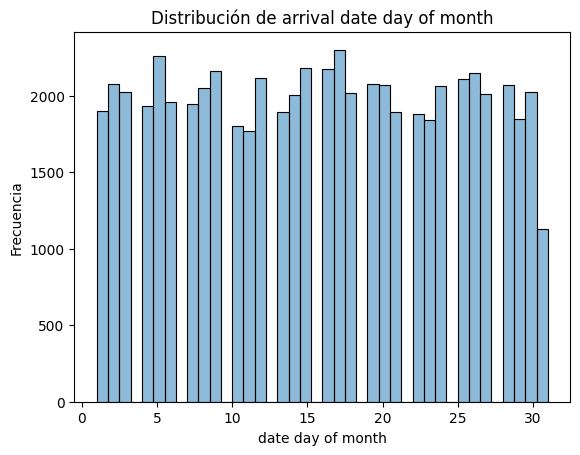

In [ ]:
sns.histplot(data=variables_cuantitativas['arrival_date_day_of_month'], alpha = 0.5).set(title="Distribución de arrival date day of month",xlabel="date day of month",ylabel="Frecuencia")

#### **stays_in_weekend_nights** 

Esta variable indica la cantidad de noches de fin de semana en la reserva

In [ ]:
variables_cuantitativas.stays_in_weekend_nights.value_counts()

0     26905
2     17213
1     15820
4       933
3       632
6        82
5        41
8        36
7        13
9         6
10        3
12        3
16        1
Name: stays_in_weekend_nights, dtype: int64

Es el único huesped que se quedó 16 días de fines de semana en una reserva.
Vemos como 12 días de fin de semana ya es un valor menos típico pero que se repite.

[Text(0.5, 1.0, 'Distribución de stays in weekend nights'),
 Text(0.5, 0, 'días de estadía en el fin de semana'),
 Text(0, 0.5, 'Frecuencia')]

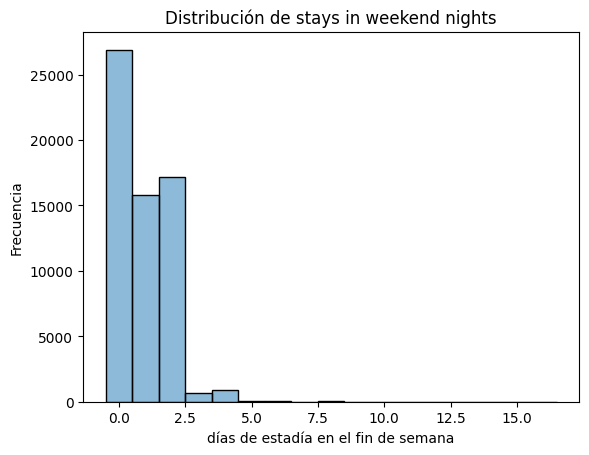

In [ ]:
sns.histplot(data=variables_cuantitativas['stays_in_weekend_nights'], bins=16 ,discrete=True, alpha = 0.5).set(title="Distribución de stays in weekend nights",xlabel="días de estadía en el fin de semana",ylabel="Frecuencia")

[Text(0.5, 1.0, 'Distribución de stays in weekend nights'),
 Text(0.5, 0, 'días de estadía en el fin de semana'),
 Text(0, 0.5, 'Frecuencia')]

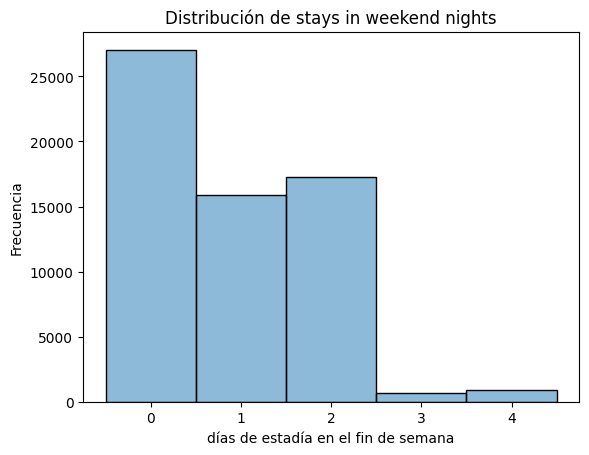

In [ ]:
#Graficamos los registros con menos de 5 días de estadía en los fines de semana para visualizar mejor
df_filtrado_fines_de_semana = df_hotels_train_original[df_hotels_train_original['stays_in_weekend_nights'] < 5]
sns.histplot(data=df_filtrado_fines_de_semana['stays_in_weekend_nights'], discrete=True, alpha = 0.5).set(title="Distribución de stays in weekend nights",xlabel="días de estadía en el fin de semana",ylabel="Frecuencia")

#### **stays_in_week_nights**

Esta variable indica la cantidad de noches de semana en la reserva

In [ ]:
variables_cuantitativas.stays_in_week_nights.value_counts()

2     17986
1     15338
3     11554
5      5640
4      4976
0      3683
6       792
7       528
10      506
8       344
9       122
15       48
12       28
11       26
19       23
14       23
20       21
13       11
21       10
16        9
22        6
25        3
18        3
30        3
17        2
24        2
40        1
Name: stays_in_week_nights, dtype: int64

[Text(0.5, 1.0, 'Distribución de stays in week nights'),
 Text(0.5, 0, 'días de estadía en la semana'),
 Text(0, 0.5, 'Frecuencia')]

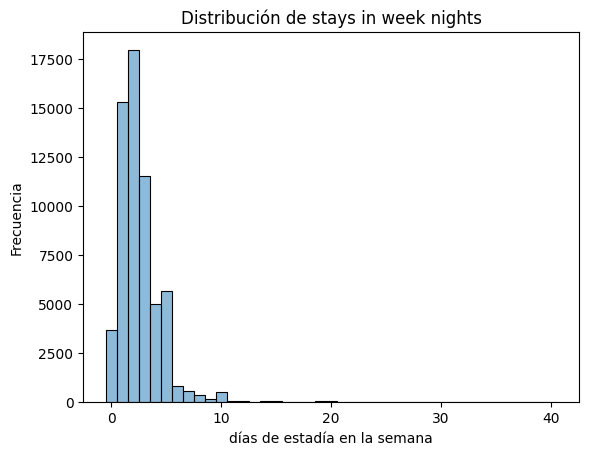

In [ ]:
sns.histplot(data=variables_cuantitativas['stays_in_week_nights'], discrete=True, alpha = 0.5).set(title="Distribución de stays in week nights",xlabel="días de estadía en la semana",ylabel="Frecuencia")

<ipython-input-89-36c2ee01920b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado_semana = variables_cuantitativas[df_hotels_train_original['stays_in_week_nights'] < 20]


(61642, 17)


[Text(0.5, 1.0, 'Distribución de stays in week nights'),
 Text(0.5, 0, 'días de estadía en la semana'),
 Text(0, 0.5, 'Frecuencia')]

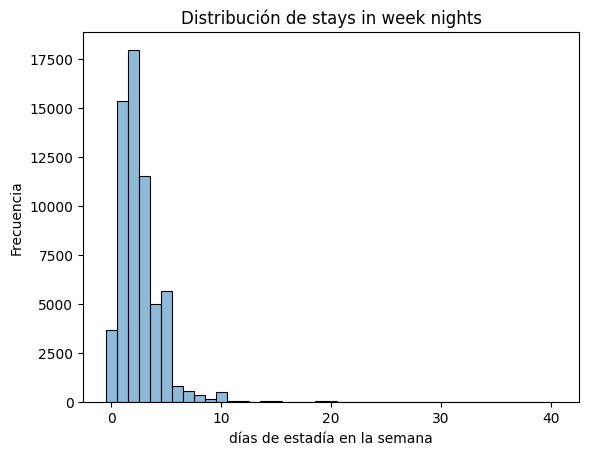

In [ ]:
#Graficamos solo los registros con menos de 20 días para visualizar mejor el gráfico
df_filtrado_semana = variables_cuantitativas[df_hotels_train_original['stays_in_week_nights'] < 20]
print(df_filtrado_semana.shape)
sns.histplot(data=df_filtrado_semana['stays_in_week_nights'], discrete=True, alpha = 0.5).set(title="Distribución de stays in week nights",xlabel="días de estadía en la semana",ylabel="Frecuencia")

#### **adults**

Esta variable indica la cantidad de adultos en la reserva

In [ ]:
variables_cuantitativas.adults.value_counts()

2     46869
1     11427
3      3159
0       192
4        30
26        3
5         2
40        1
20        1
6         1
10        1
27        1
55        1
Name: adults, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable adults'}, xlabel='Cantidad de adultos', ylabel='Frecuencia'>

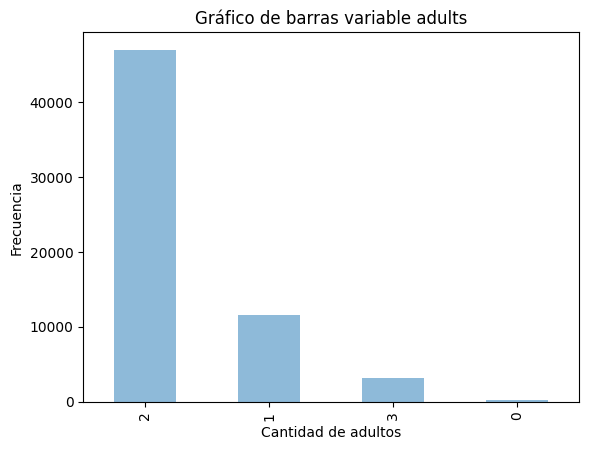

In [ ]:
#No es discreta con la suficiente granularidad para hacer un histograma
df_filtrado_adults = df_hotels_train_original[df_hotels_train_original['adults'] < 4]
df_filtrado_adults['adults'].value_counts().plot.bar(alpha=0.5, title="Gráfico de barras variable adults" , xlabel="Cantidad de adultos" , ylabel="Frecuencia")

#### **children**

Esta variable indica la cantidad de chicos en la reserva

In [ ]:
variables_cuantitativas.children.value_counts()

0.0     57238
1.0      2455
2.0      1955
3.0        39
10.0        1
Name: children, dtype: int64

[Text(0.5, 1.0, 'Distribución de children'),
 Text(0.5, 0, 'cantidad de niños en una reserva'),
 Text(0, 0.5, 'Frecuencia')]

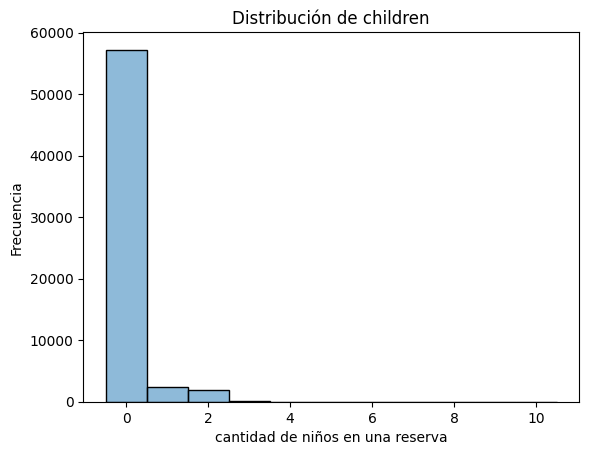

In [ ]:
sns.histplot(data=variables_cuantitativas['children'], discrete=True, alpha = 0.5).set(title="Distribución de children",xlabel="cantidad de niños en una reserva",ylabel="Frecuencia")

#### **babies** 

Esta variable indica la cantidad de bebes en una reserva

In [ ]:
variables_cuantitativas.babies.value_counts()

0    61260
1      420
2        7
9        1
Name: babies, dtype: int64

[Text(0.5, 1.0, 'Distribución de baby'),
 Text(0.5, 0, 'cantidad de bebes en una reserva'),
 Text(0, 0.5, 'Frecuencia')]

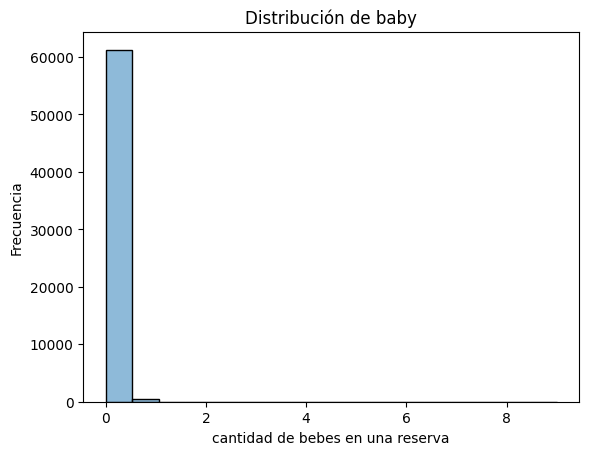

In [ ]:
sns.histplot(data=variables_cuantitativas['babies'], alpha = 0.5).set(title="Distribución de baby",xlabel="cantidad de bebes en una reserva",ylabel="Frecuencia")

#### **previous_cancellations**

Esta variable indica la cantidad de cancelaciones previas de una reserva que realizo un mismo huesped

In [ ]:
variables_cuantitativas.previous_cancellations.value_counts()

0     57317
1      4115
2        60
24       36
3        34
26       20
19       17
4        16
25       16
11       15
14       12
6        12
5         9
13        8
21        1
Name: previous_cancellations, dtype: int64

[Text(0.5, 1.0, 'Distribución de previous cancellations'),
 Text(0.5, 0, 'previous cancellations'),
 Text(0, 0.5, 'Frecuencia')]

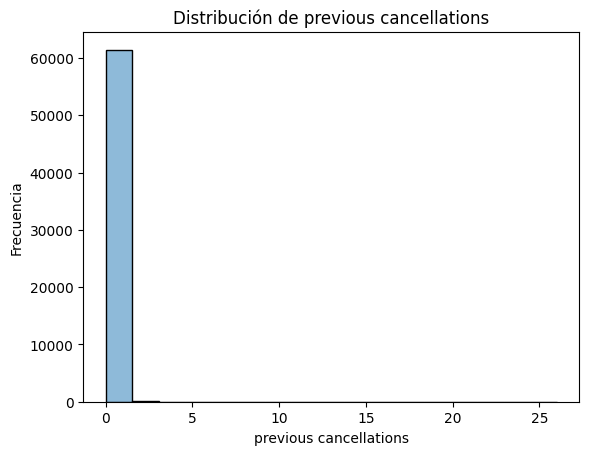

In [ ]:
sns.histplot(data=variables_cuantitativas['previous_cancellations'], alpha = 0.5).set(title="Distribución de previous cancellations",xlabel="previous cancellations",ylabel="Frecuencia")
#sera mejor un grafico de densidad? No aporta este grafico

#### **previous_bookings_not_canceled**

Variable que indica la cantidad de reservas previas por el cliente que no fueron canceladas.

In [ ]:
variables_cuantitativas.previous_bookings_not_canceled.value_counts()

0     60244
1       592
2       237
3       135
4        97
5        76
6        41
8        28
7        28
9        23
10       23
11       21
13       19
12       14
14       12
25       10
15        9
17        7
24        6
18        5
20        5
22        5
26        5
16        4
19        4
28        4
21        4
27        3
29        3
23        2
58        2
56        1
32        1
69        1
63        1
36        1
59        1
31        1
49        1
30        1
50        1
41        1
43        1
61        1
55        1
33        1
70        1
38        1
62        1
40        1
64        1
Name: previous_bookings_not_canceled, dtype: int64

[Text(0.5, 1.0, 'Distribución de previous bookings not canceled'),
 Text(0.5, 0, 'previous bookings not canceled'),
 Text(0, 0.5, 'Frecuencia')]

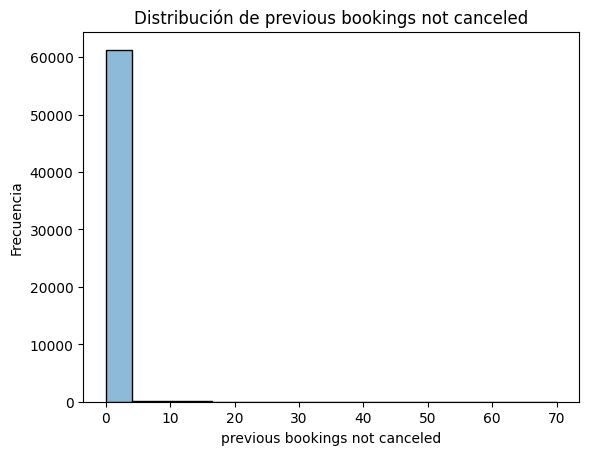

In [ ]:
sns.histplot(data=variables_cuantitativas['previous_bookings_not_canceled'], alpha = 0.5).set(title="Distribución de previous bookings not canceled",xlabel="previous bookings not canceled",ylabel="Frecuencia")

#### **booking_changes**

Esta variable indica la cantidad de cambios en una misma reserva

In [ ]:
variables_cuantitativas.booking_changes.value_counts()

0     53407
1      5790
2      1791
3       407
4       163
5        58
6        32
7        16
8        10
13        3
10        3
9         2
14        2
12        1
15        1
17        1
11        1
Name: booking_changes, dtype: int64

[Text(0.5, 1.0, 'Distribución de booking changes'),
 Text(0.5, 0, 'cambios en reservas'),
 Text(0, 0.5, 'Frecuencia')]

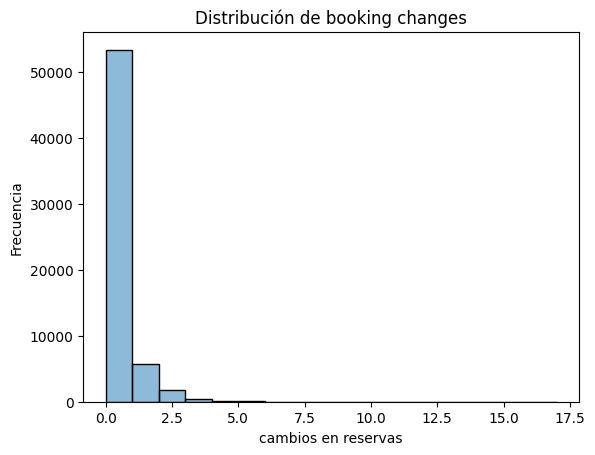

In [ ]:
sns.histplot(data=variables_cuantitativas['booking_changes'],alpha = 0.5).set(title="Distribución de booking changes",xlabel="cambios en reservas",ylabel="Frecuencia")

####**booking_changes_boolean**

Creamos una nueva variable: Determina si se hizo por lo menos un cambio en la reserva.

In [ ]:

funcion_binaria_changes= lambda x: 1 if x > 0 else 0


df_hotels_train_copy['booking_changes_boolean'] = df_hotels_train_copy['booking_changes'].apply(funcion_binaria_changes)

In [ ]:
df_hotels_train_copy.booking_changes_boolean.value_counts()

0    53407
1     8281
Name: booking_changes_boolean, dtype: int64

In [ ]:
df_filtrado_changes = df_hotels_train_copy[df_hotels_train_copy['booking_changes_boolean'] == True]

df_filtrado_changes.booking_changes_boolean.value_counts()
df_filtrado_changes.is_canceled.value_counts()

0    6294
1    1987
Name: is_canceled, dtype: int64

In [ ]:
(df_filtrado_changes.is_canceled.sum()) * 100 / (df_filtrado_changes.booking_changes_boolean.sum())

23.99468663204927

[Text(0.5, 1.0, 'Relacion entre cancelaciones y cambios hechos en la reserva'),
 Text(0.5, 0, 'Cantidad de cancelaciones en reservas con cambio'),
 Text(0, 0.5, 'Frecuencia')]

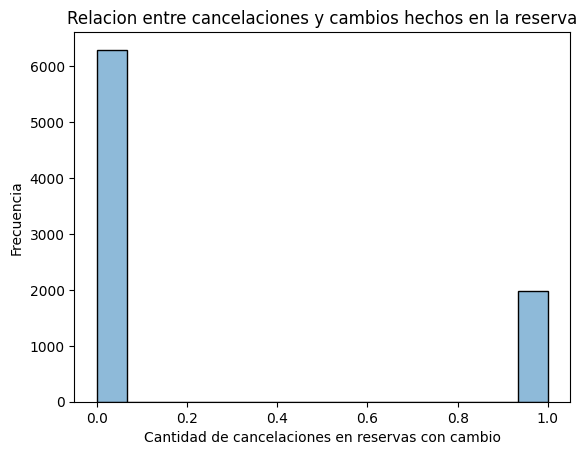

In [ ]:
sns.histplot(data=df_filtrado_changes['is_canceled'], alpha = 0.5).set(title="Relacion entre cancelaciones y cambios hechos en la reserva",xlabel="Cantidad de cancelaciones en reservas con cambio",ylabel="Frecuencia")

Podemos ver que la gran mayoría de los clientes que hicieron por lo menos un cambio en la reserva no cancelaron. Solo el 24% canceló.

#### **days_in_waiting_list** 

Esta variable indica la cantidad de dias que una reserva estuvo en dias de espera.

In [ ]:
variables_cuantitativas.days_in_waiting_list.value_counts()

0      59453
39       155
31        90
44        83
58        82
       ...  
81         1
121        1
97         1
193        1
105        1
Name: days_in_waiting_list, Length: 116, dtype: int64

In [ ]:
variables_cuantitativas.days_in_waiting_list.sort_values().tail(10)

6529     391
8976     391
51186    391
53261    391
43168    391
14677    391
12368    391
38732    391
5554     391
13590    391
Name: days_in_waiting_list, dtype: int64

Veamos exactamente cuantas reservas hay de 391 días de espera, ya que parecen más de lo esperado

In [ ]:
variables_cuantitativas[df_hotels_train_original.days_in_waiting_list==391].days_in_waiting_list.shape

<ipython-input-109-30694b4ab165>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  variables_cuantitativas[df_hotels_train_original.days_in_waiting_list==391].days_in_waiting_list.shape


(33,)

33 reservas tienen 391 días de espera. Gráfiquemos esta variable vs su cantidad para tener una vista más amplia de esta variable.

[Text(0.5, 1.0, 'Distribución de days in waiting list'),
 Text(0.5, 0, 'days in waiting list'),
 Text(0, 0.5, 'Frecuencia')]

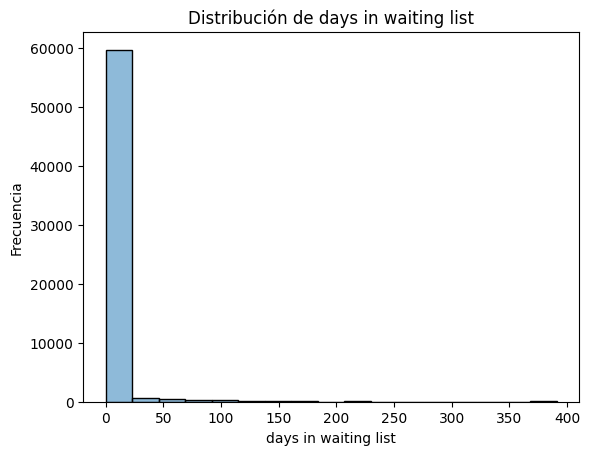

In [ ]:
sns.histplot(data=variables_cuantitativas['days_in_waiting_list'], alpha = 0.5).set(title="Distribución de days in waiting list",xlabel="days in waiting list",ylabel="Frecuencia")

Este gráfico esta muy distorsionado y no nos proporciona mucha información, más allá de la información de que la mayoría de los clientes no esperaron días hasta que se confirme la reserva.
Por lo que para analizar más la variable graficaremos la distribución de la variable **cantidad de días mayor a 0** que esperaron los clientes para que se confirme la reserva.

In [ ]:
#Porcentaje de reservas que esperaron 1 día o más para que se confirme la reserva
df_filtrado_waiting_list = variables_cuantitativas[df_hotels_train_original['days_in_waiting_list'] > 0]
cantidad_de_reservas = variables_cuantitativas.shape[0]
print("Porcentaje de reservas que esperaron 1 día o más: " + (str((df_filtrado_waiting_list.shape[0] * 100) / cantidad_de_reservas)) + "%")

Porcentaje de reservas que esperaron 1 día o más: 3.605239268577357%


<ipython-input-111-8a775e06da86>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado_waiting_list = variables_cuantitativas[df_hotels_train_original['days_in_waiting_list'] > 0]


In [ ]:
df_filtrado_waiting_list.days_in_waiting_list.value_counts().head(10)

0      2123
77        7
39        6
45        5
22        5
58        4
28        4
111       3
101       3
44        3
Name: days_in_waiting_list, dtype: int64

[Text(0.5, 1.0, 'Distribución de days in waiting list > 0'),
 Text(0.5, 0, 'Días esperados por el cliente hasta que se confirme la reserva'),
 Text(0, 0.5, 'Frecuencia')]

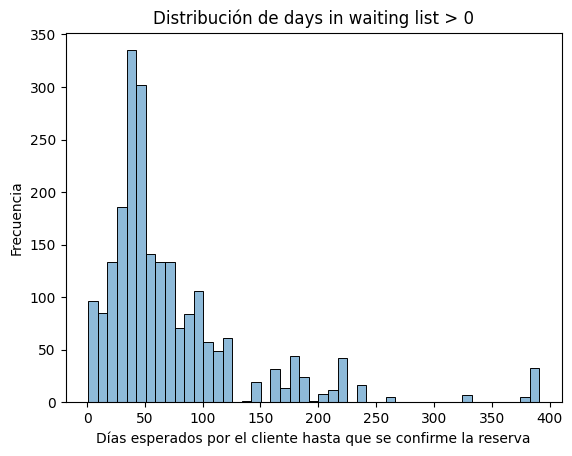

In [ ]:
df_filtrado_waiting_list = variables_cuantitativas[variables_cuantitativas['days_in_waiting_list'] > 0]
sns.histplot(data=df_filtrado_waiting_list['days_in_waiting_list'], alpha = 0.5).set(title="Distribución de days in waiting list > 0",xlabel="Días esperados por el cliente hasta que se confirme la reserva",ylabel="Frecuencia")

Observamos que una vez que el cliente pasa a tener que esperar 1 día o más hasta que se le confirme la reserva. Los valores más frecuentes se encuentran por los 30 a 70 días

#### **required_car_parking_spaces** 

Esta variable indica la cantidad de espacios requeridos solicitados en una reserva

In [ ]:
variables_cuantitativas.required_car_parking_spaces.value_counts()

0    58658
1     3016
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable cantidad de espacíos de estacionamientos requeridos'}, xlabel='Cantidad de espacios de estacionamiento', ylabel='Frecuencia'>

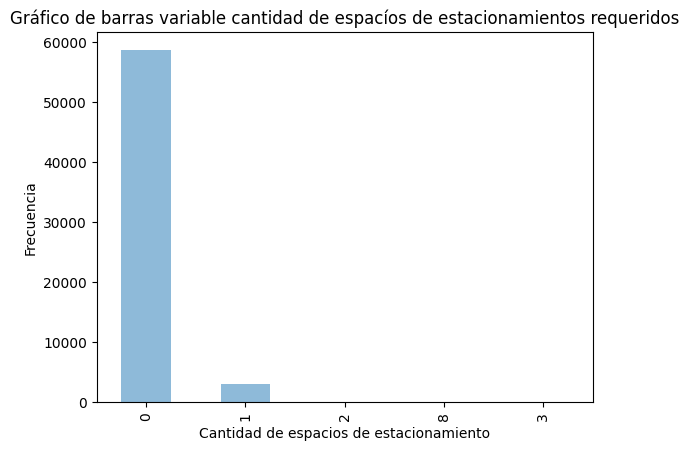

In [ ]:
variables_cuantitativas.required_car_parking_spaces.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable cantidad de espacíos de estacionamientos requeridos" , xlabel="Cantidad de espacios de estacionamiento" , ylabel="Frecuencia")


#### **total_of_special_requests** 

Esta variable indica el total de requerimientos especiales hechos en una reserva

In [ ]:
variables_cuantitativas.total_of_special_requests.value_counts()

0    38474
1    15660
2     6201
3     1185
4      150
5       18
Name: total_of_special_requests, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable cantidad pedidos especiales requeridos'}, xlabel='Cantidad de pedidos especiales', ylabel='Frecuencia'>

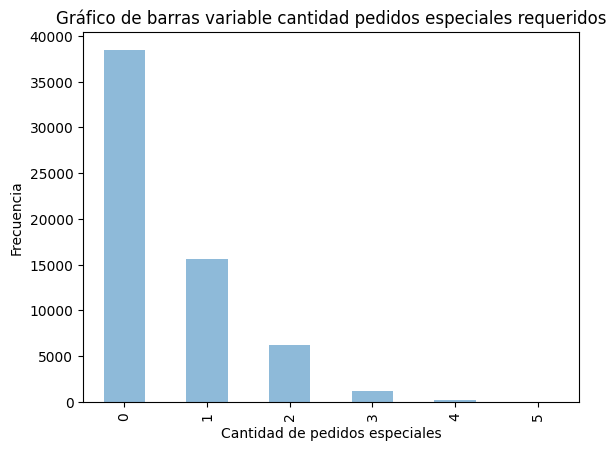

In [ ]:
variables_cuantitativas.total_of_special_requests.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable cantidad pedidos especiales requeridos" , xlabel="Cantidad de pedidos especiales" , ylabel="Frecuencia")

#### **special_request_boolean**

Determina si hubo alguna special request

In [ ]:

funcion_binaria_requests = lambda x: 1 if x > 0 else 0


df_hotels_train_copy['special_request_boolean'] = df_hotels_train_copy['total_of_special_requests'].apply(funcion_binaria_requests)

df_hotels_train_copy.special_request_boolean.value_counts()




0    38474
1    23214
Name: special_request_boolean, dtype: int64

In [ ]:
df_filtrado_requests = df_hotels_train_copy[df_hotels_train_copy['special_request_boolean'] == True]

df_filtrado_requests.special_request_boolean.value_counts()


1    23214
Name: special_request_boolean, dtype: int64

In [ ]:
df_filtrado_requests.is_canceled.value_counts()

0    15697
1     7517
Name: is_canceled, dtype: int64

In [ ]:
(df_filtrado_requests.is_canceled.sum()) * 100 / (df_filtrado_requests.special_request_boolean.sum())

32.38132161626605

El 68% de los clientes que hicieron al menos una special request no canceló.

Si lo sumamos con booking_changes_boolean quizas conseguimos aumentar el porcentaje. Es decir, tomar a los clientes que hicieron cambios en la reserva y además hicieron special requests.

In [ ]:

funcion_binaria_requests = lambda x: 1 if x > 1 else 0


df_hotels_train_copy['special_request_and_changes_made'] = ((df_hotels_train_copy['special_request_boolean']) + (df_hotels_train_copy['booking_changes_boolean'])).apply(funcion_binaria_requests)

df_hotels_train_copy.special_request_and_changes_made.value_counts()

0    57988
1     3700
Name: special_request_and_changes_made, dtype: int64

In [ ]:
df_filtrado_requests_changes = df_hotels_train_copy[df_hotels_train_copy['special_request_and_changes_made'] == True]

df_filtrado_requests_changes.special_request_and_changes_made.value_counts()

1    3700
Name: special_request_and_changes_made, dtype: int64

In [ ]:
df_filtrado_requests_changes.is_canceled.value_counts()

0    2844
1     856
Name: is_canceled, dtype: int64

In [ ]:
(df_filtrado_requests_changes.is_canceled.sum()) * 100 / (df_filtrado_requests_changes.special_request_and_changes_made.sum())

23.135135135135137

Concluimos que si el cliente hizo algun cambio en la reserva  y además hizo una special request tiene una probabilidad de 77% de no cancelar

#### **reservation_status_date**

Esta variable indica la fecha del ultimo status actualizado de la reserva

In [ ]:
variables_cuantitativas.reservation_status_date.value_counts()

2015-10-21    1013
2015-07-06     549
2015-01-01     540
2016-11-25     526
2016-01-18     431
              ... 
2015-05-08       1
2015-03-12       1
2015-02-12       1
2015-01-28       1
2015-01-29       1
Name: reservation_status_date, Length: 915, dtype: int64

### Medidas de resumen de las variables cuantitativas (Media, Máximos, Mínimos, Cuartiles y Mediana)

In [ ]:
medidas = variables_cuantitativas.describe()
medidas

adr        adults  arrival_date_day_of_month  \
count  61688.000000  61688.000000               61688.000000   
mean     102.533874      1.864350                  15.789392   
std       47.708637      0.588537                   8.795593   
min       -6.380000      0.000000                   1.000000   
25%       70.000000      2.000000                   8.000000   
50%       95.000000      2.000000                  16.000000   
75%      126.000000      2.000000                  23.000000   
max      510.000000     55.000000                  31.000000   

       arrival_date_week_number  arrival_date_year        babies  \
count              61688.000000       61688.000000  61688.000000   
mean                  27.217206        2016.155865      0.007181   
std                   13.515078           0.708285      0.092325   
min                    1.000000        2015.000000      0.000000   
25%                   17.000000        2016.000000      0.000000   
50%                   28.000000        2016.000000      0.000000   
75%                   38.000000        2017.000000      0.000000   
max                   53.000000        2017.000000      9.000000   

       booking_changes      children  days_in_waiting_list     lead_time  \
count     61688.000000  61688.000000          61688.000000  61688.000000   
mean          0.195970      0.105239              2.648603    112.510245   
std           0.610905      0.403488             18.652334    110.741959   
min           0.000000      0.000000              0.000000      0.000000   
25%           0.000000      0.000000              0.000000     23.000000   
50%           0.000000      0.000000              0.000000     78.000000   
75%           0.000000      0.000000              0.000000    172.000000   
max          17.000000     10.000000            391.000000    629.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count            61688.000000                    61688.000000   
mean                 0.114820                        0.111561   
std                  0.995343                        1.389375   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       70.000000   

       required_car_parking_spaces  stays_in_week_nights  \
count                 61688.000000          61688.000000   
mean                      0.049459              2.511428   
std                       0.220017              1.885164   
min                       0.000000              0.000000   
25%                       0.000000              1.000000   
50%                       0.000000              2.000000   
75%                       0.000000              3.000000   
max                       8.000000             40.000000   

       stays_in_weekend_nights  total_of_special_requests  
count             61688.000000               61688.000000  
mean                  0.925399                   0.523716  
std                   0.993214                   0.775089  
min                   0.000000                   0.000000  
25%                   0.000000                   0.000000  
50%                   1.000000                   0.000000  
75%                   2.000000                   1.000000  
max                  16.000000                   5.000000

Observaciones:

**lead_time:** Vemos que tiene una media de 112 días. Un mínimo de de 0 días para alguien que realizo el booking y llegó al hotel en el mismo día y un máximo de 629 días, casi 2 años desde el booking hasta el arribo.

**arrival_date_week_number:** Vemos que llega hasta la semana 53 del año, tambíen habría que tener en cuenta en las cantidades que ciertos números de semanas no estan incluidos en los 3 años. Tambien observamos que la media es la semana 27

**arrival_date_day_of_month:** La media se encuentra en el día 16

Algo interesante a analizar sería ver si los días con mayor cantidad de arribos, cayeron en fechas de fin de semana. Vemos como el día 31 es quien menor cantidad de arribos tuvo, esto se puede deber a que no todos los meses llegan a ese día.

Cerrando las variables relacionadas a la cantidad de arribos segun el dia/semana/mes/año. Será que mientras menos cantidades tiene alguna de estas, que simplemente se reservaron y concretaron menos estadías? O tendrá que ver que la menor cantidad de arribos se debe a mayor cancelación de reservas hechas.

**stays_in_weekend_nights**: Observamos como la media de días de fin de semana esta en 1, mientras que hubo una reserva que contiene 16 días de fin de semana. Sería interesante analizar si es un outlier.

**stays_in_week_nights**: Lógicamente para los días de semana al ser más aumenta la media de la cantidad de días de estadía. La media pasa a ser 2.5 días. Y vemos como una persona reservó o se quedó 40 días de semana, será la misma que la que se quedó 16 días de fin de semana?

**adults:** Vemos como una reserva contiene 55 adultos, bastante separado de los demás valores. Más allá de si sea un caso real o un caso mal cargado, existe la posibilidad de que este valor, estorbe para ciertos cálculos.

**previous_cancellations:** Vemos como hay 20 clientes que cancelaron 26 reservas previas a la actual y esta es la cantidad máxima de cancelaciones de reservas previas.

**previous_bookings_not_cancelled:** Podemos observar como un cliente ya hizo 70 reservas previas sin cancelar. Será de interes analizar esta columna, cantidades tan altas de previas reservas sin cancelar pueden llegar a ser buenos indicadores de que la reserva no esté cancelada.

### Moda: 

Para analizar la moda, generamos un nuevo dataframe utilizando el metodo **mode**:

In [ ]:
moda = variables_cuantitativas.mode()
moda

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
0  62.0       2                         17                        33   

   arrival_date_year  babies  booking_changes  children  days_in_waiting_list  \
0               2016       0                0       0.0                     0   

   lead_time  previous_cancellations  previous_bookings_not_canceled  \
0          0                       0                               0   

   required_car_parking_spaces reservation_status_date  stays_in_week_nights  \
0                            0              2015-10-21                     2   

   stays_in_weekend_nights  total_of_special_requests  
0                        0                          0

Viendo los resultados que nos arroja el método podemos definir:


*   Las variables **babies, booking_changes, children, days_in_waiting_list, lead_ time, previous_cancellations, previous_bookings_not_canceled, required_car_parking_spaces, stays_in_weekend_nights, total_of_special_requests** son **amodales**, ya que en todas las filas del dataset estas toman valores distintos. Esto puede verse reflejado en los histogramas correspondientes a cada variable.
*   Las variables **adr, adults, arrival_date_day_of_month, arrival_date_week_number, arrival_date_year, reservation_status_date, stays_in_week_nights** son variables de moda **unica**, es decir, no hay más de un valor que posea una la misma frecuencia para una variable.



### Valores nulos respecto de las variables cuantitativas

El único campo con valor nulo es **children**

In [ ]:
cant_childrn_nulos= variables_cuantitativas.children.isna().sum()
cant_childrn_nulos

0

In [ ]:
#Porcentaje de nulos
(cant_childrn_nulos * 100) / variables_cuantitativas.shape[0]

0.0

Al ser un porcentaje tan bajo de filas con valor faltante, procedemos a eliminar estas filas.

In [ ]:
df_hotels_train_copy=df_hotels_train_copy.dropna(subset=['children'])
df_hotels_train_copy['children'].isna().sum()

0

## Busqueda de outliers

**ADR**

[Text(0.5, 1.0, 'Boxplot ADR')]

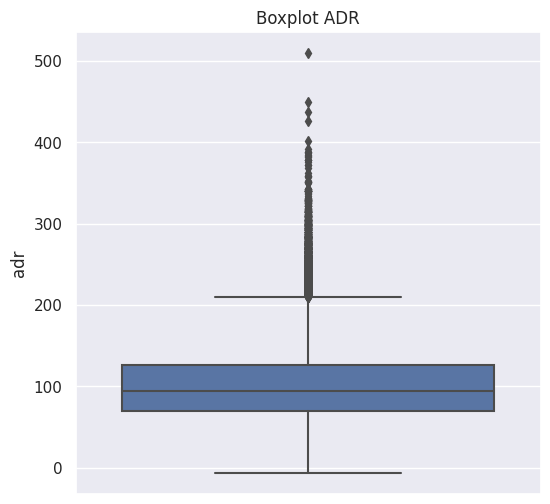

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="adr", data = variables_cuantitativas).set(title = "Boxplot ADR")
box_age

Los outlayers de esta variable son dentro de lo esperado, puede haber reservas con muchos más gatos en ADR que otras, pero ninguna se encuentra en un rango completamente desproporcionado (Por ejemplo si hubiesemos encontrado un valor mayor a 1 millón)

**Lead_time**

[Text(0.5, 1.0, 'Boxplot LeadTime')]

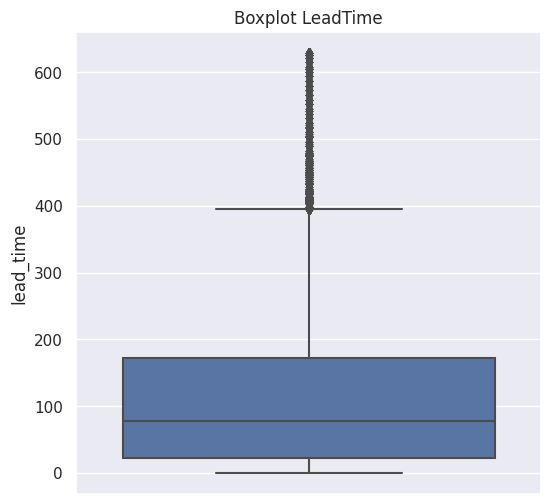

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="lead_time", data = variables_cuantitativas).set(title = "Boxplot LeadTime")
box_age

Analizando por el gráfico la gran cantidad de valores mayores a 400, podria considerarse que es normal que una reserva este por arriba de los 400 días y hasta 2 años.

**stays_in_weekend_nights**

[Text(0.5, 1.0, 'Boxplot StaysInWeekendNights')]

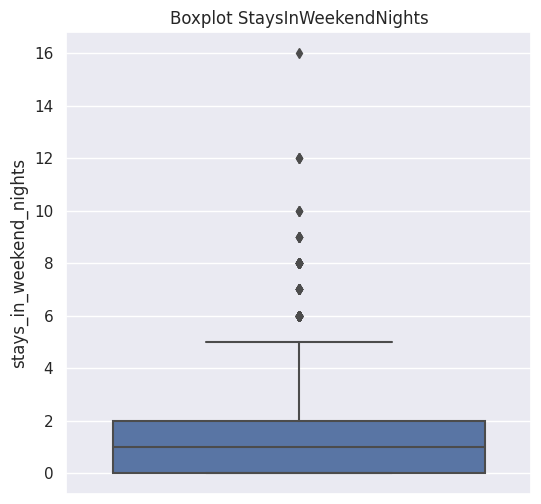

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="stays_in_weekend_nights", data = variables_cuantitativas).set(title = "Boxplot StaysInWeekendNights")
box_age

In [ ]:
stays_in_weekend_nights = variables_cuantitativas[variables_cuantitativas['stays_in_weekend_nights'] > 14]
stays_in_weekend_nights

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
31310  25.5       2                         10                         2   

       arrival_date_year  babies  booking_changes  children  \
31310               2017       0                0       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
31310                     0        322                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
31310                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
31310              2016-10-31                    40                       16   

       total_of_special_requests  
31310                          0

**stays_in_week_nights**

[Text(0.5, 1.0, 'Boxplot StaysInWeekNights')]

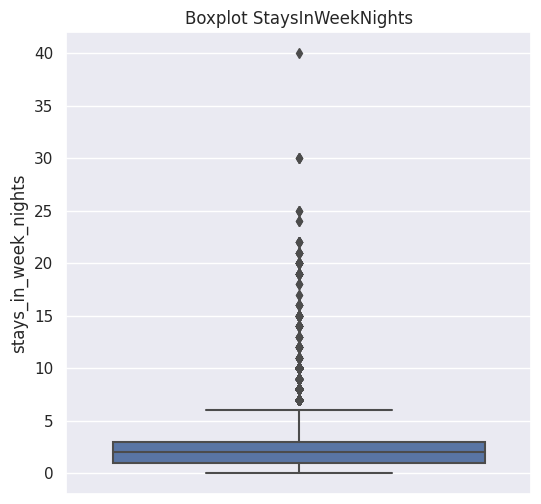

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="stays_in_week_nights", data = variables_cuantitativas).set(title = "Boxplot StaysInWeekNights")
box_age

In [ ]:
stays_in_week_nights = variables_cuantitativas[variables_cuantitativas['stays_in_week_nights'] > 35]
stays_in_week_nights

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
31310  25.5       2                         10                         2   

       arrival_date_year  babies  booking_changes  children  \
31310               2017       0                0       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
31310                     0        322                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
31310                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
31310              2016-10-31                    40                       16   

       total_of_special_requests  
31310                          0

Podemos observar que los outlayers stays_in_week_nights > 40 y stays_in_weekend_nights > 16 pertenecen al mismo registro con lo cual se considera una larga estadia y por lo tanto consideramos el dato consistente.

**total_of_special_requests**

[Text(0.5, 1.0, 'Boxplot TotalOfSpecialRequests')]

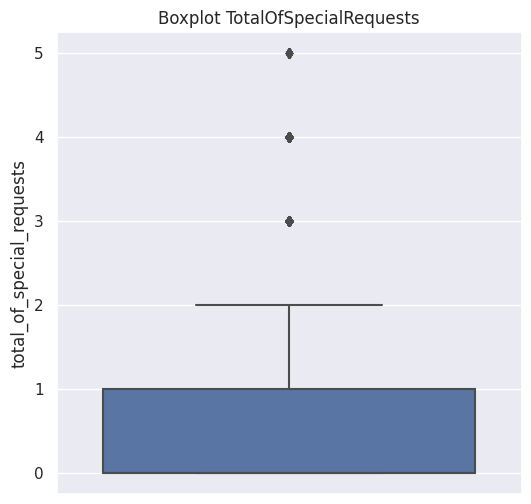

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="total_of_special_requests", data = variables_cuantitativas).set(title = "Boxplot TotalOfSpecialRequests")
box_age

Consideramos los outlayers como valores dentro de lo esperado.

**adults**

[Text(0.5, 1.0, 'Boxplot ')]

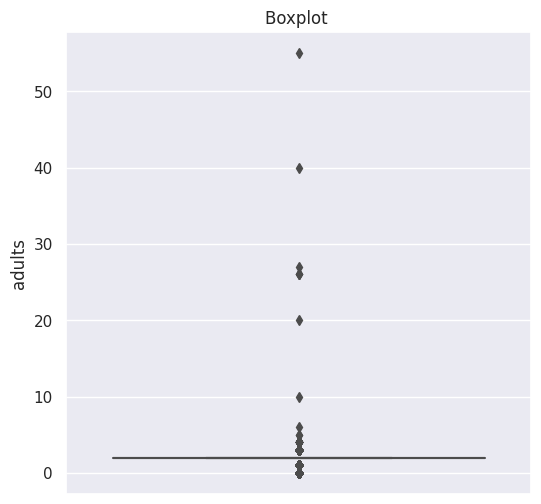

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="adults", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

Analizamos la existencias de valores negativos

In [ ]:
variables_cuantitativas.adults.sort_values()

33398     0
30939     0
45931     0
55225     0
7832      0
         ..
38305    26
19146    26
55112    27
4064     40
59165    55
Name: adults, Length: 61913, dtype: int64

In [ ]:
adults = variables_cuantitativas[variables_cuantitativas['adults'] > 35]
adults

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
4064   0.0      40                          3                        36   
59165  0.0      55                          4                        41   

       arrival_date_year  babies  booking_changes  children  \
4064                2015       0                0       0.0   
59165               2015       0                0       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
4064                      0        304                       0   
59165                     0        338                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
4064                                0                            0   
59165                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
4064               2015-01-02                     3                        0   
59165              2015-01-02                     0                        2   

       total_of_special_requests  
4064                           0  
59165                          0

**children**

[Text(0.5, 1.0, 'Boxplot ')]

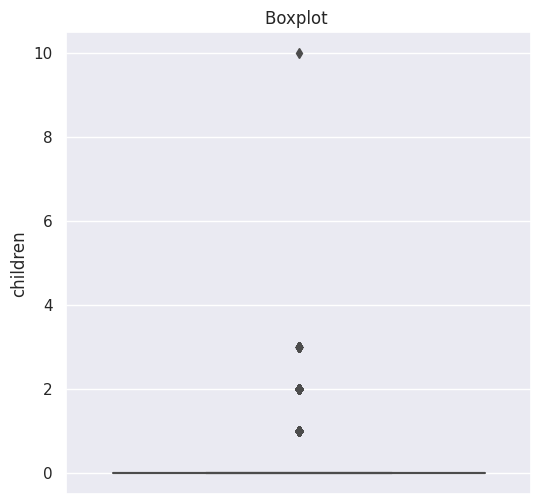

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="children", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

In [ ]:
children = variables_cuantitativas[variables_cuantitativas['children'] > 4]
children

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
49181  133.16       2                         12                        29   

       arrival_date_year  babies  booking_changes  children  \
49181               2015       0                2      10.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
49181                     0         55                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
49181                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
49181              2015-07-12                    10                        4   

       total_of_special_requests  
49181                          1

**babies**

[Text(0.5, 1.0, 'Boxplot ')]

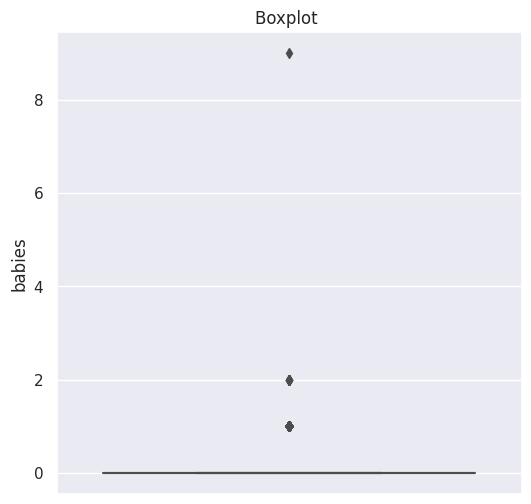

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="babies", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

In [ ]:
babies = variables_cuantitativas[variables_cuantitativas['babies'] > 8]
babies

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
12659  95.0       1                         11                        42   

       arrival_date_year  babies  booking_changes  children  \
12659               2015       9                1       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
12659                     0         11                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
12659                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
12659              2015-10-14                     1                        2   

       total_of_special_requests  
12659                          0

**bold text**

[Text(0.5, 1.0, 'Boxplot ')]

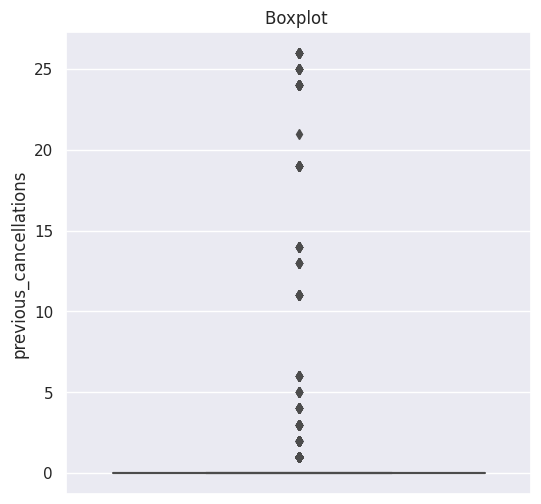

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="previous_cancellations", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

[Text(0.5, 1.0, 'Boxplot ')]

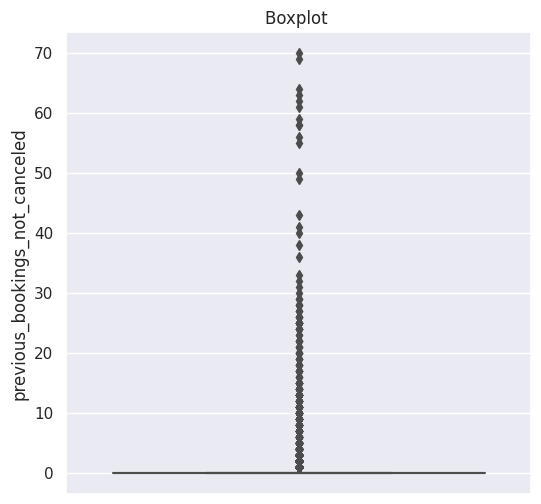

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="previous_bookings_not_canceled", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

[Text(0.5, 1.0, 'Boxplot ')]

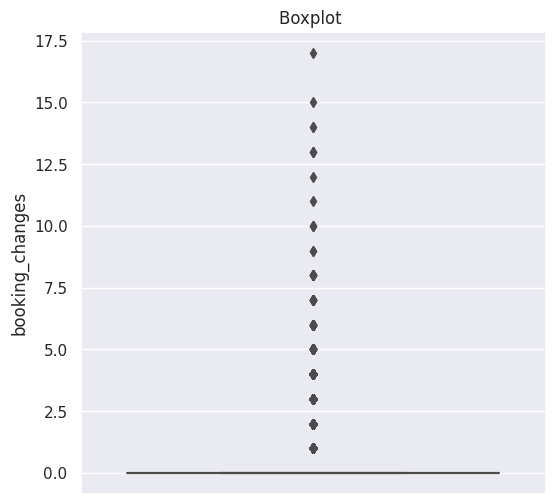

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="booking_changes", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

[Text(0.5, 1.0, 'Boxplot ')]

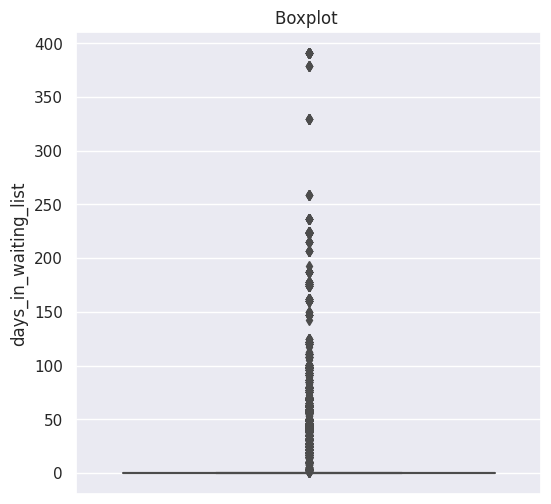

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="days_in_waiting_list", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

[Text(0.5, 1.0, 'Boxplot')]

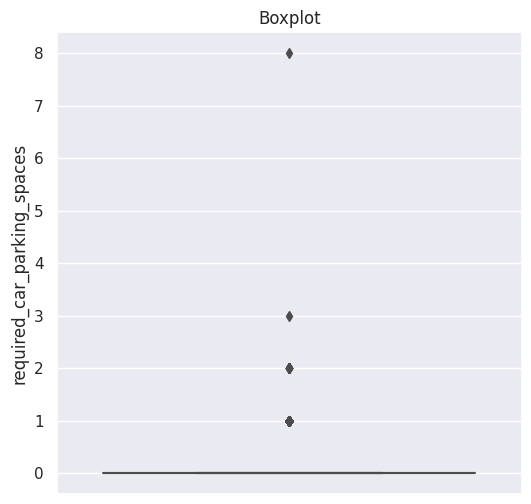

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="required_car_parking_spaces", data = variables_cuantitativas).set(title = "Boxplot")
box_age

In [ ]:
required_car_parking_spaces = variables_cuantitativas[variables_cuantitativas['required_car_parking_spaces'] > 7]
required_car_parking_spaces

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
8269  80.0       2                         19                        12   

      arrival_date_year  babies  booking_changes  children  \
8269               2017       0                1       0.0   

      days_in_waiting_list  lead_time  previous_cancellations  \
8269                   122        138                       0   

      previous_bookings_not_canceled  required_car_parking_spaces  \
8269                               2                            8   

     reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
8269              2017-03-23                     2                        2   

      total_of_special_requests  
8269                          0

## Correlaciones para las variables numéricas.

Graficamos las variables de a pares, aplicamos Correlación de Pearson y generamos un heatmap para poder evaluar las relaciones entre las variables:

In [ ]:
matriz_correlacion_original = df_hotels_train_original.corr()
matriz_correlacion_original

<ipython-input-146-1ddb71915049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion_original = df_hotels_train_original.corr()


lead_time  arrival_date_year  \
lead_time                        1.000000           0.023186   
arrival_date_year                0.023186           1.000000   
arrival_date_week_number         0.134793          -0.540542   
arrival_date_day_of_month       -0.006937           0.002326   
stays_in_weekend_nights          0.059463           0.027066   
stays_in_week_nights             0.140110           0.040803   
adults                           0.110942           0.026576   
children                        -0.046058           0.059412   
babies                          -0.022872          -0.013745   
is_repeated_guest               -0.108033          -0.004587   
previous_cancellations           0.094634          -0.142232   
previous_bookings_not_canceled  -0.068102           0.027109   
booking_changes                 -0.019736           0.027285   
agent                           -0.078786           0.081634   
company                          0.150773           0.243066   
days_in_waiting_list             0.166423          -0.058523   
adr                             -0.094559           0.217409   
required_car_parking_spaces     -0.113772          -0.011620   
total_of_special_requests       -0.122760           0.107899   
is_canceled                      0.293816           0.019923   

                                arrival_date_week_number  \
lead_time                                       0.134793   
arrival_date_year                              -0.540542   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.057730   
stays_in_weekend_nights                         0.014127   
stays_in_week_nights                            0.012200   
adults                                          0.025886   
children                                        0.006355   
babies                                          0.016215   
is_repeated_guest                              -0.022037   
previous_cancellations                          0.045530   
previous_bookings_not_canceled                 -0.023897   
booking_changes                                 0.012086   
agent                                          -0.043968   
company                                        -0.040886   
days_in_waiting_list                            0.019328   
adr                                             0.075427   
required_car_parking_spaces                     0.001424   
total_of_special_requests                       0.029283   
is_canceled                                     0.008357   

                                arrival_date_day_of_month  \
lead_time                                       -0.006937   
arrival_date_year                                0.002326   
arrival_date_week_number                         0.057730   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.015518   
stays_in_week_nights                            -0.026449   
adults                                           0.002449   
children                                         0.013991   
babies                                           0.002568   
is_repeated_guest                               -0.005230   
previous_cancellations                          -0.034516   
previous_bookings_not_canceled                  -0.002026   
booking_changes                                  0.009522   
agent                                            0.002600   
company                                          0.049011   
days_in_waiting_list                             0.027754   
adr                                              0.033695   
required_car_parking_spaces                      0.000295   
total_of_special_requests                        0.007744   
is_canceled                                     -0.007371   

                                stays_in_weekend_nights  stays_in_week_nights  \
lead_time                                      0.059463        

<Axes: >

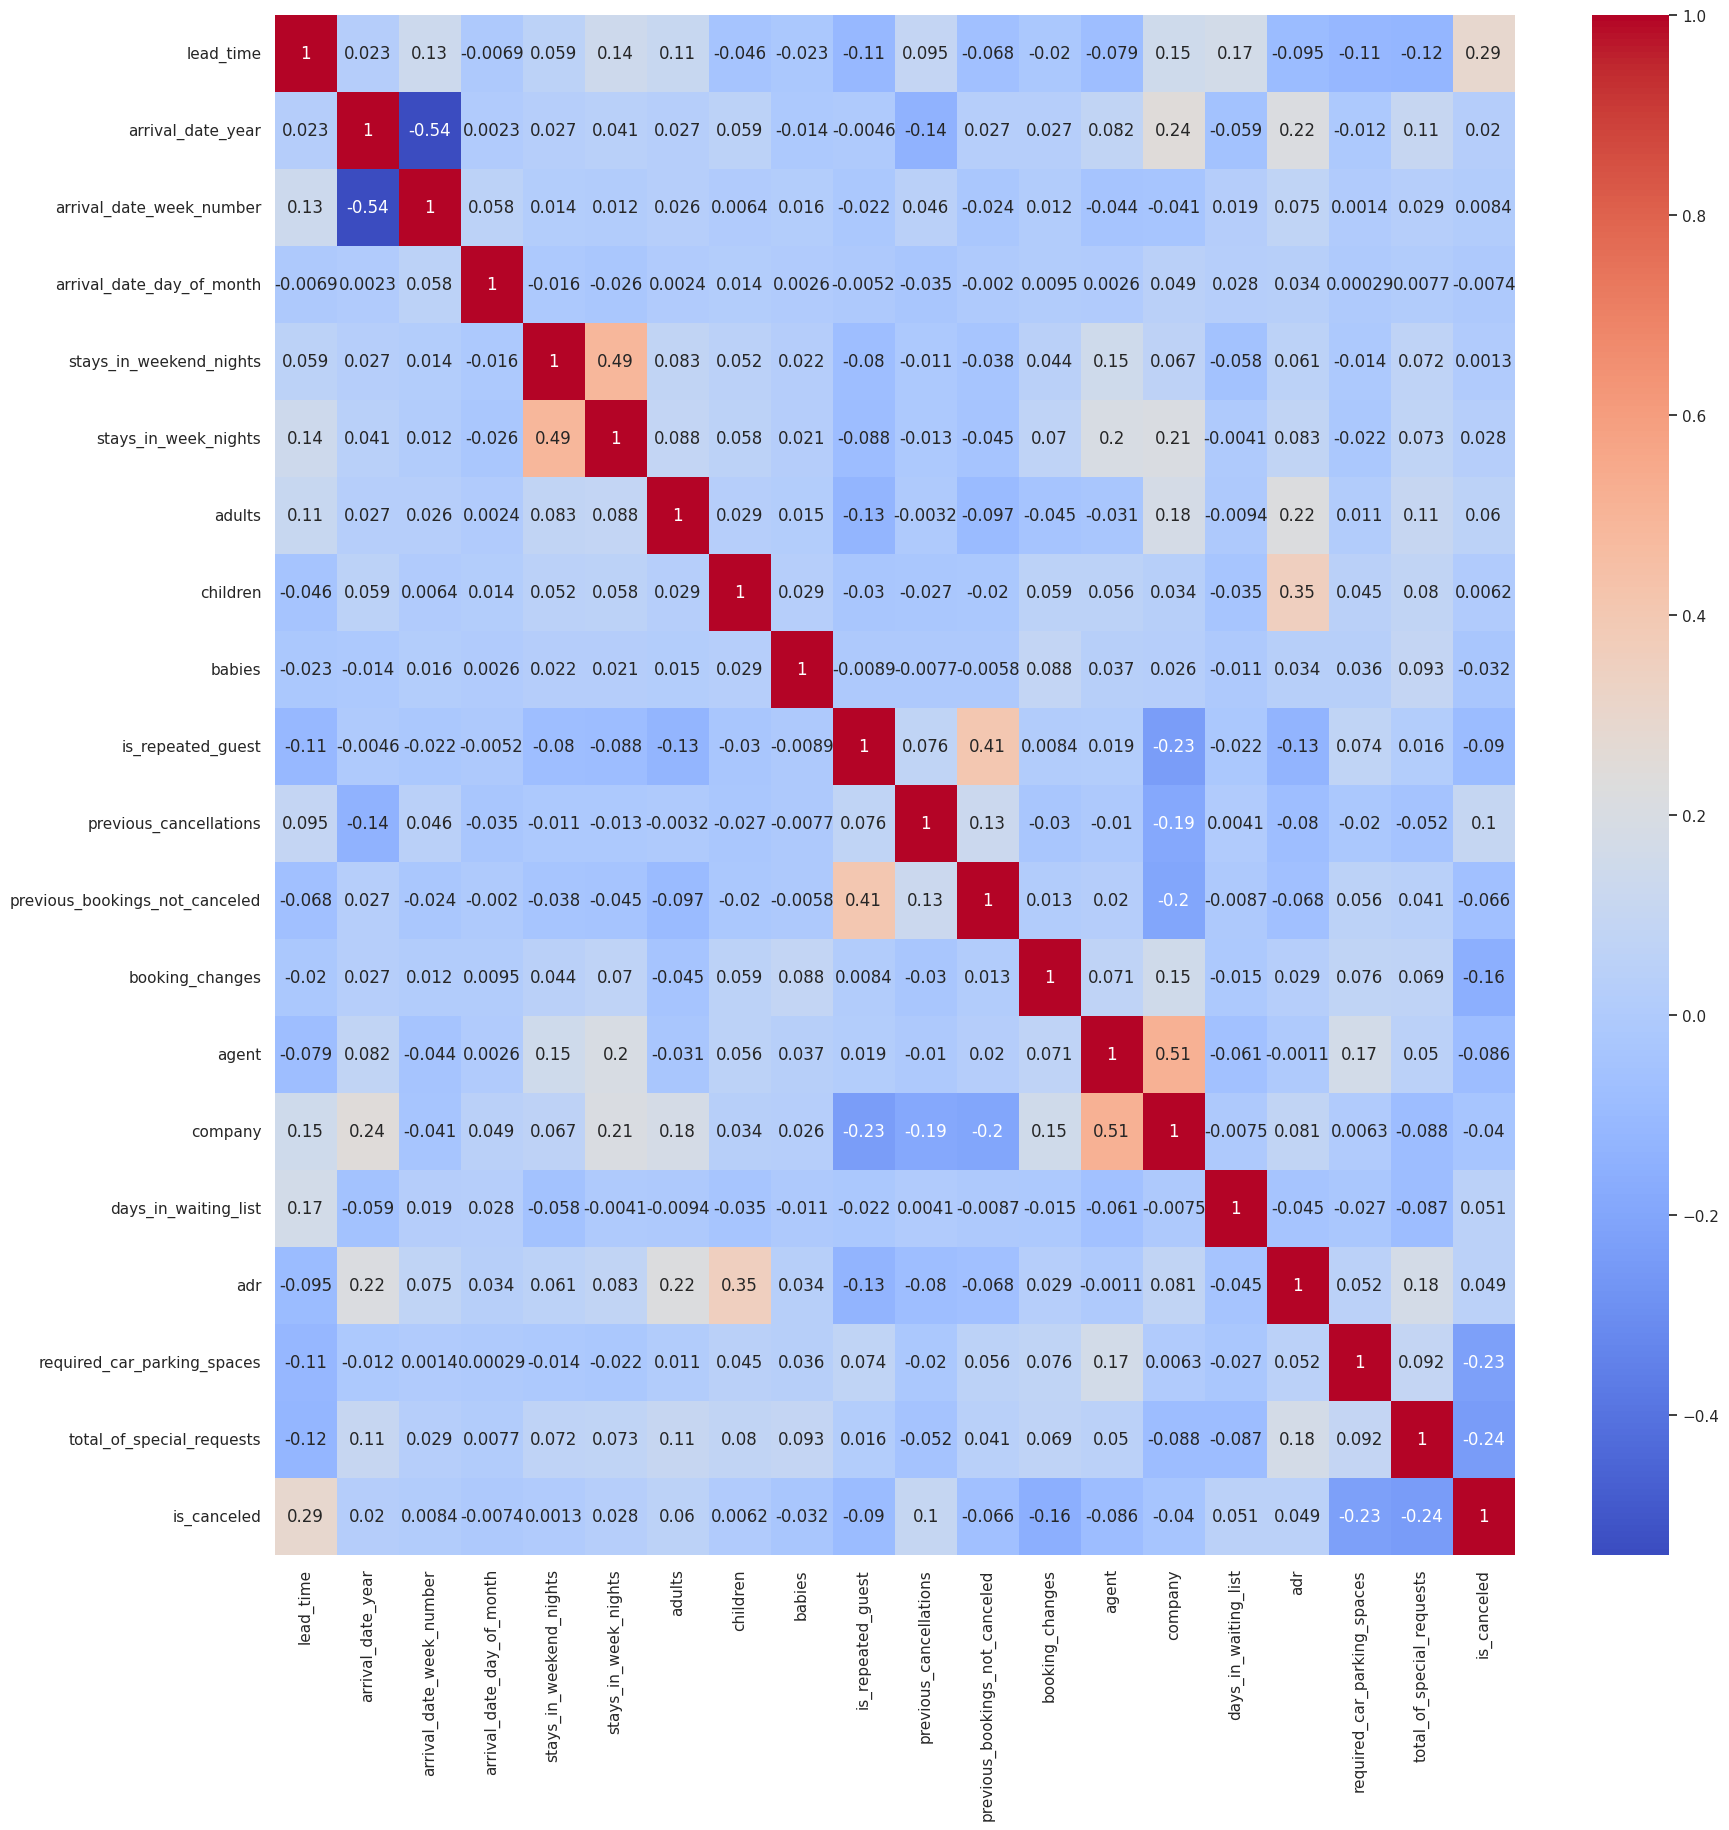

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(matriz_correlacion_original, annot = True, cmap='coolwarm')

Tienen una relación fuerte con el target
**lead_time_, total_of_special_requests, required_car_parking_spaces**. 

Ahora hacemos lo mismo pero con el df de copy que fuimos modificando

In [ ]:
matriz_correlacion_copy = df_hotels_train_copy.corr()
matriz_correlacion_copy

<ipython-input-148-2442f6485af1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion_copy = df_hotels_train_copy.corr()


lead_time  arrival_date_year  \
lead_time                          1.000000           0.023140   
arrival_date_year                  0.023140           1.000000   
arrival_date_week_number           0.134620          -0.540415   
arrival_date_day_of_month         -0.006911           0.002053   
stays_in_weekend_nights            0.057817           0.027037   
stays_in_week_nights               0.138748           0.041311   
adults                             0.108644           0.026222   
children                          -0.046660           0.059170   
babies                            -0.023093          -0.013894   
is_repeated_guest                 -0.108615          -0.004864   
previous_cancellations             0.094490          -0.142359   
previous_bookings_not_canceled    -0.066015           0.027878   
booking_changes                   -0.019626           0.027340   
agent                             -0.026567           0.071400   
company                           -0.084767           0.031917   
days_in_waiting_list               0.166360          -0.058864   
adr                               -0.097494           0.217706   
required_car_parking_spaces       -0.112843          -0.011083   
total_of_special_requests         -0.123034           0.108208   
is_canceled                        0.292580           0.019758   
deposit_boolean                    0.404741          -0.076989   
booking_changes_boolean           -0.031613           0.019891   
special_request_boolean           -0.146331           0.121308   
special_request_and_changes_made  -0.020168           0.039548   

                                  arrival_date_week_number  \
lead_time                                         0.134620   
arrival_date_year                                -0.540415   
arrival_date_week_number                          1.000000   
arrival_date_day_of_month                         0.057531   
stays_in_weekend_nights                           0.013488   
stays_in_week_nights                              0.011616   
adults                                            0.025556   
children                                          0.006394   
babies                                            0.016263   
is_repeated_guest                                -0.022085   
previous_cancellations                            0.045447   
previous_bookings_not_canceled                   -0.023927   
booking_changes                                   0.011958   
agent                                            -0.029970   
company                                          -0.030391   
days_in_waiting_list                              0.019389   
adr                                               0.075091   
required_car_parking_spaces                       0.001610   
total_of_special_requests                         0.029067   
is_canceled                                       0.007573   
deposit_boolean                                   0.007466   
booking_changes_boolean                           0.011893   
special_request_boolean                           0.013126   
special_request_and_changes_made                  0.020071   

                                  arrival_date_day_of_month  \
lead_time                                         -0.006911   
arrival_date_year                                  0.002053   
arrival_date_week_number                           0.057531   
arrival_date_day_of_month                          1.000000   
stays_in_weekend_nights                           -0.015707   
stays_in_week_nights                              -0.026445   
adults                                             0.002313   
children                                           0.013915   
babies                                             0.002541   
is_repeated_guest                                 -0.005309   
previous_cancellations                            -0.034483   
previous_bookings_not_canceled                    -0.001016   
booking_chang

<Axes: >

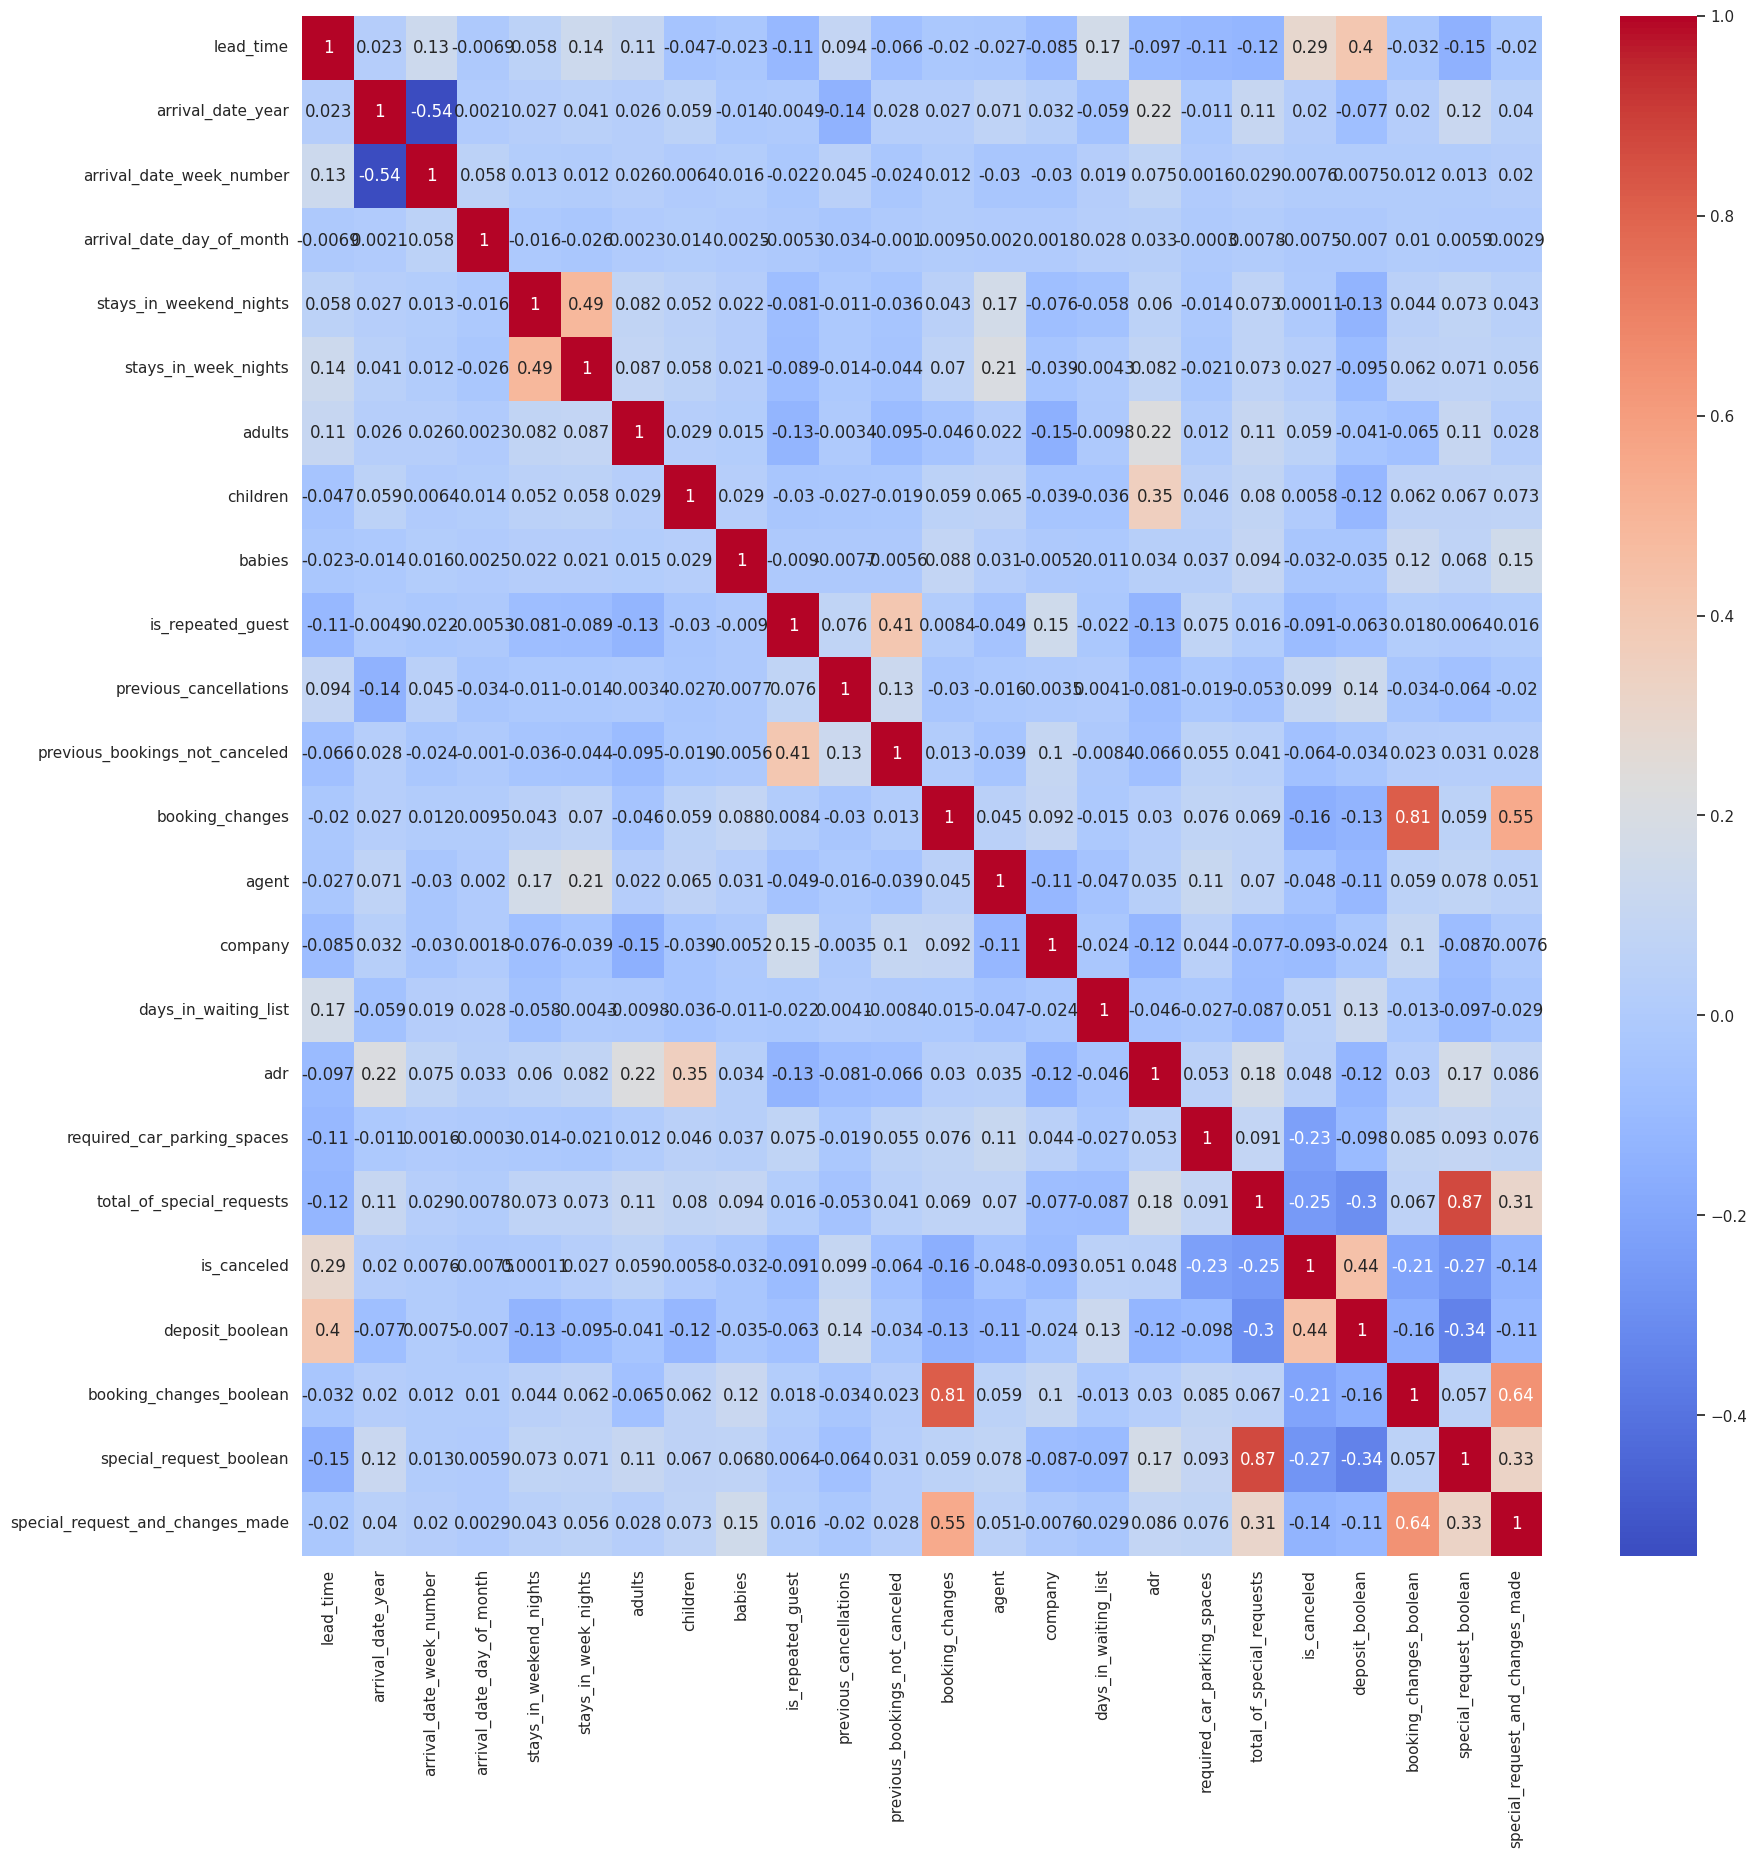

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(matriz_correlacion_copy, annot = True, cmap='coolwarm')

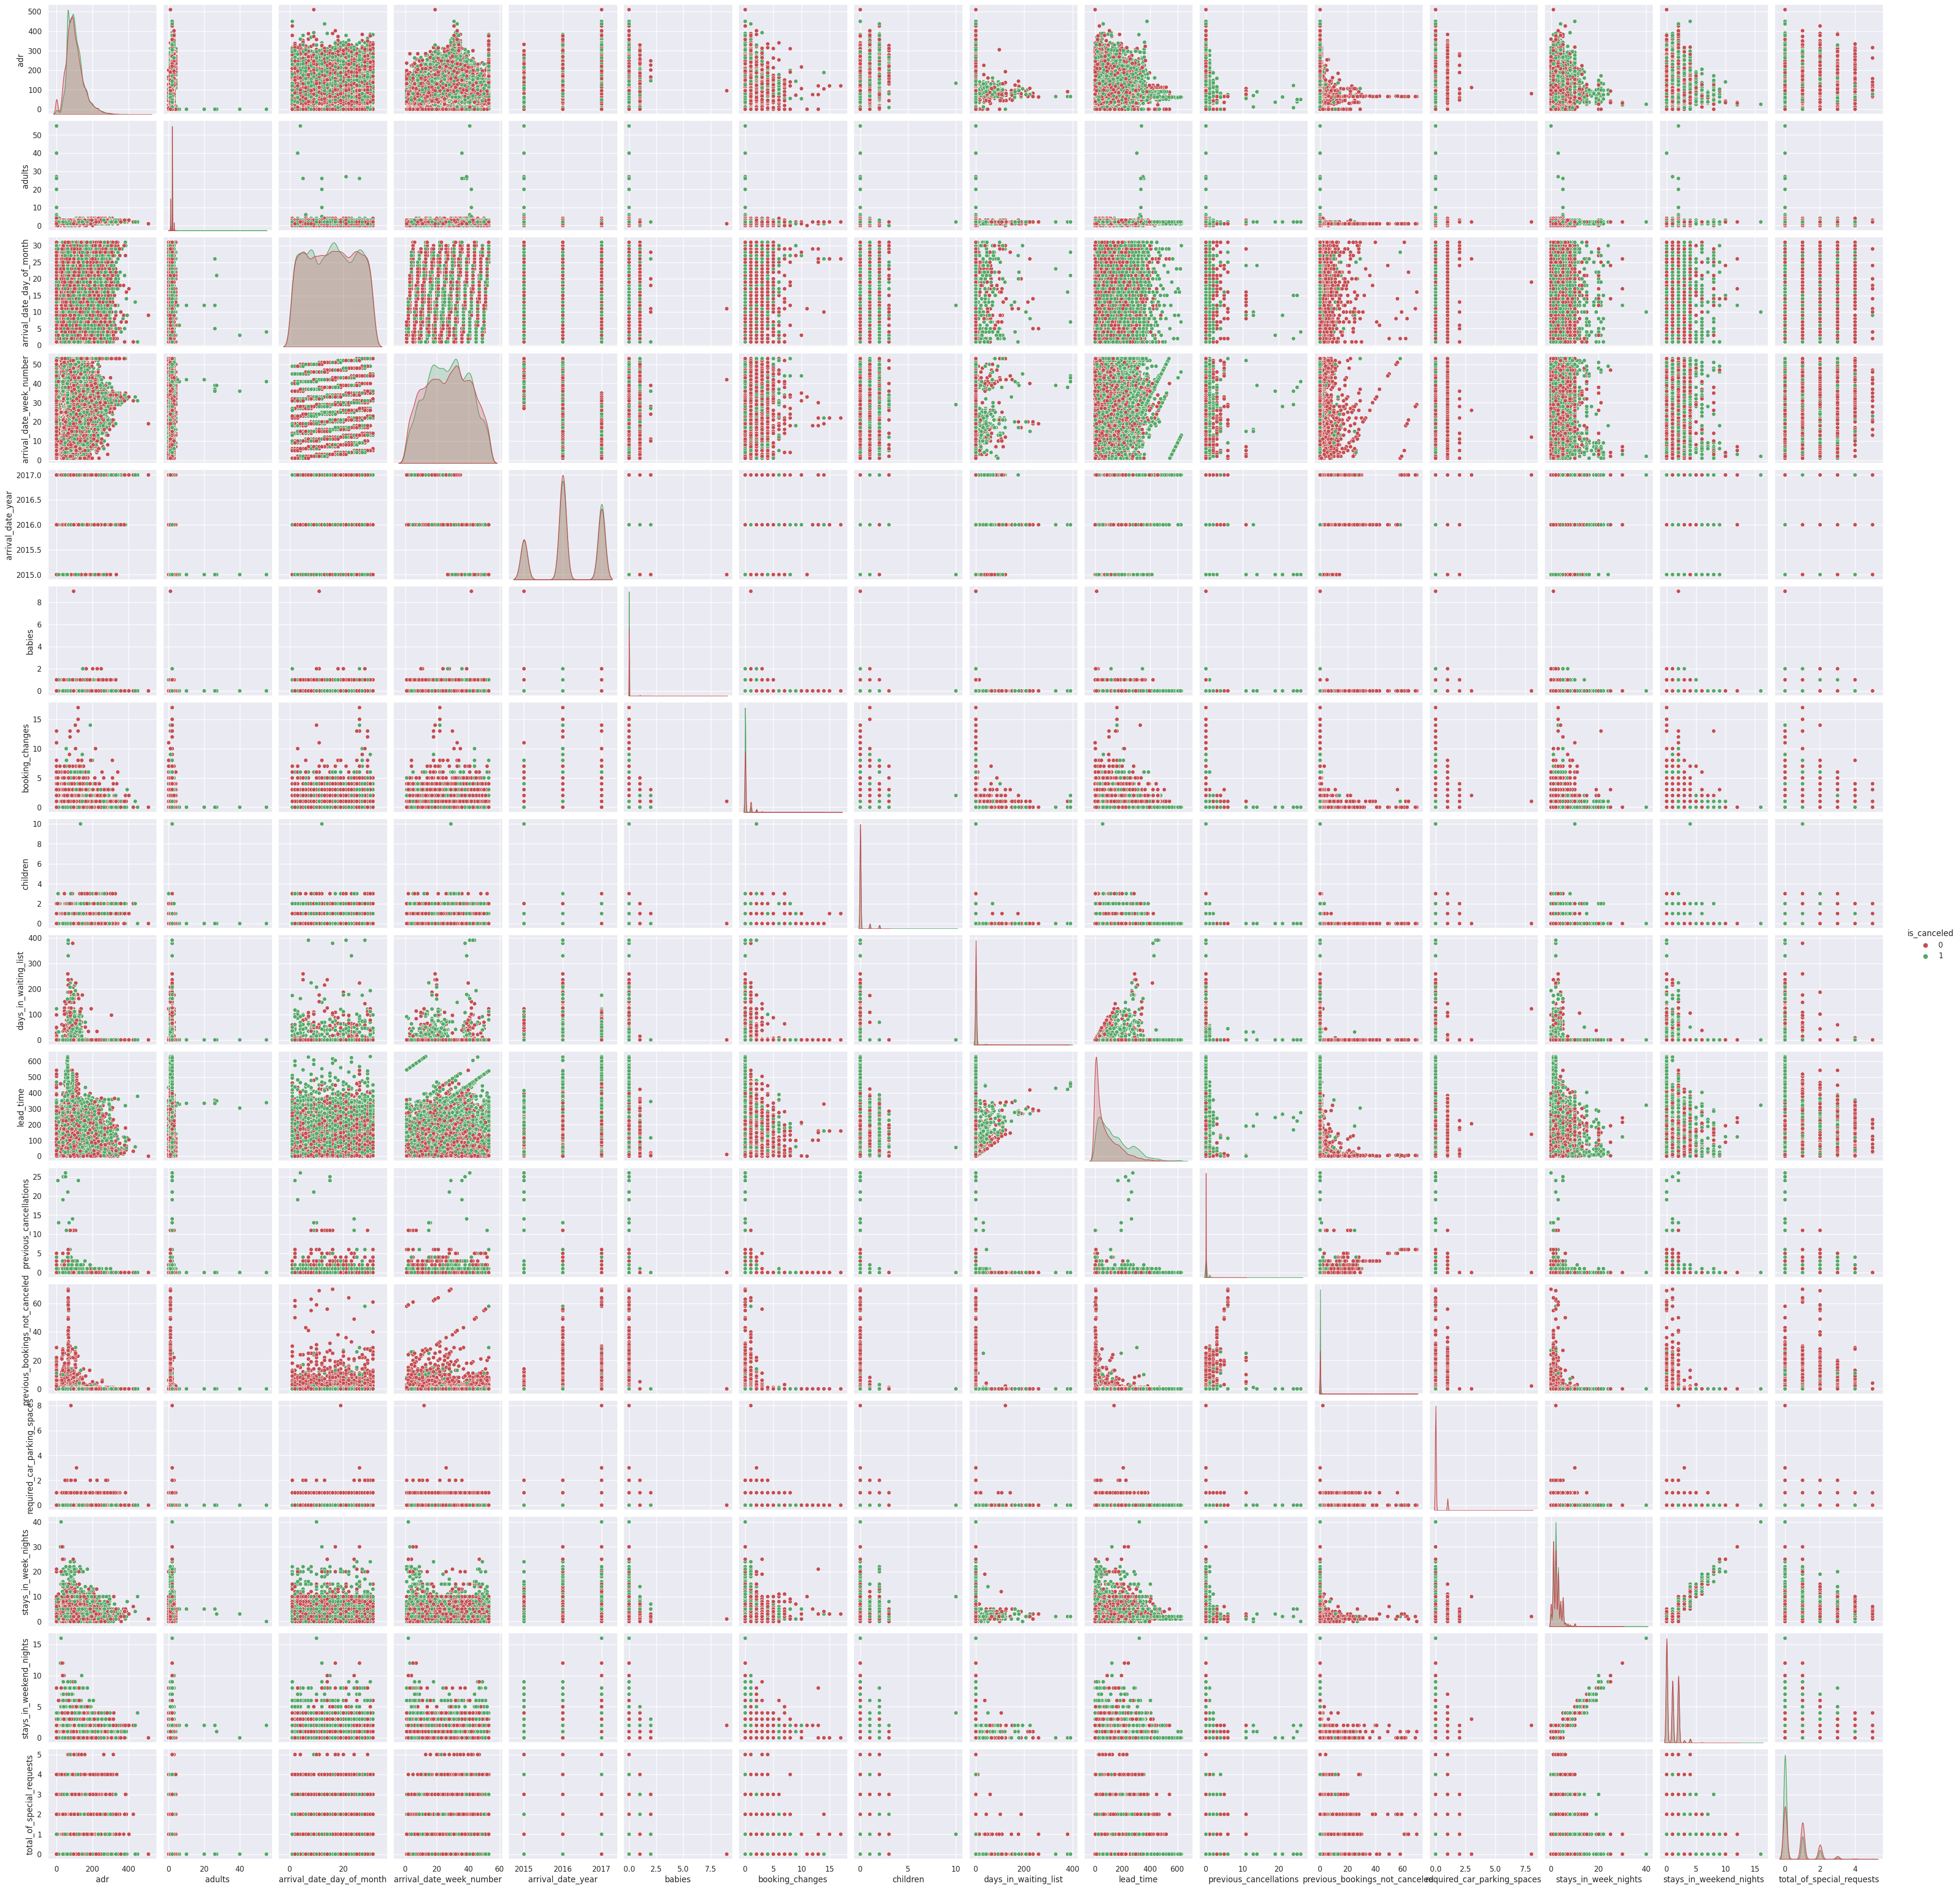

In [ ]:

variables_cuantitativas_e_is_canceld = pd.DataFrame(data = df_hotels_train_copy, columns = ["adr", "adults", "arrival_date_day_of_month", "arrival_date_week_number","arrival_date_year",
                                                                                  "babies","booking_changes","children","days_in_waiting_list","lead_time","previous_cancellations",
                                                                                  "previous_bookings_not_canceled","required_car_parking_spaces","reservation_status_date",
                                                                                  "stays_in_week_nights","stays_in_weekend_nights","total_of_special_requests", "is_canceled"])
columns=variables_cuantitativas_e_is_canceld.columns.tolist()

ds_pariplot=variables_cuantitativas_e_is_canceld[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pariplot, hue="is_canceled", palette=["r", "g"])